In [22]:
import numpy as np
import copy as copy
import random as random

In [23]:
shape=[[(x,4**(int(x-1))) for x in range(1,env.layers+1,1)][-1]]
Maze=[(x[0],np.zeros((int(x[1]**0.5),int(x[1]**0.5)))) for x in [shape[-1]]]

NameError: name 'env' is not defined

In [24]:
Maze

NameError: name 'Maze' is not defined

In [290]:
class Normal_Maze():
    def __init__(self,nlayers,barrier):
        self.action_space=['n','s','e','w']
        self.layers=nlayers
        self.shape=4**(int(self.layers-1))
        shape=[[(x,4**(int(x-1))) for x in range(1,self.layers+1,1)][-1]]
        self.Maze=[(x[0],np.zeros((int(x[1]**0.5),int(x[1]**0.5)))) for x in [shape[-1]]]
        self.number_actions=len(self.action_space)
#         self.Maze_2=[(x[0],np.zeros((len(env.action_space),int(x[1]**0.5),int(x[1]**0.5)))) for x in shape]
        
#         create random barriers
        if barrier==True:
            mask=np.random.rand(self.Maze[-1][1].shape[0],self.Maze[-1][1].shape[0])
            self.Maze[-1][1][mask>0.9]=1
        
            
    def set_goal_state(self):
        self.goal_state=[random.sample(range(x),1)[0] for x in self.Maze[-1][1].shape]
        while self.Maze[-1][1][self.goal_state[0]][self.goal_state[1]]==1:
            self.goal_state=[random.sample(range(x),1)[0] for x in self.Maze[-1][1].shape]
    def reset(self):  
#       random starting state  
        s1=[random.sample(range(x),1)[0] for x in self.Maze[-1][1].shape]
        self.starting_state=copy.deepcopy(s1)
        self.current_state=copy.deepcopy(self.starting_state)
# make sure goal and starting state not the same
        c1= self.goal_state==self.starting_state
        c2= self.Maze[-1][1][self.starting_state[0]][self.starting_state[1]]==1
        count=0
        while c1 or c2 :
#              self.goal_state=[random.sample(range(x),1)[0] for x in self.Maze[-1][1].shape]
            self.starting_state=self.current_state=[random.sample(range(x),1)[0] for x in self.Maze[-1][1].shape]
            count=count+1
            if count>10:
                if c2:
                    self.Maze[-1][1][self.starting_state[0]][self.starting_state[1]]=0
            c1= self.goal_state==self.starting_state
            c2= self.Maze[-1][1][self.starting_state[0]][self.starting_state[1]]==1
        

        self.starting_level=self.current_level=env.layers-1

        
#         self.starting_state_init=self.starting_managers[0]
#         self.done=False
# just to know

    def step(self,action):
        done=False
        old_state=copy.deepcopy(self.current_state)

        reward=-1

        level=env.layers-1
# south
        if action == 0: 
            if self.current_state[0]-1>=0:
                if self.Maze[-1][1][self.current_state[0]-1][self.current_state[1]]!=1:
                    self.current_state[0]=self.current_state[0]-1

#               north
        elif action == 1:
            if self.current_state[0]+1<self.Maze[-1][1].shape[0]:
                if self.Maze[-1][1][self.current_state[0]+1][self.current_state[1]]!=1:

                    self.current_state[0]=self.current_state[0]+1
#               East
        elif action==2:

            if self.current_state[1]+1<self.Maze[-1][1].shape[0]:
                if self.Maze[-1][1][self.current_state[0]][self.current_state[1]+1]!=1:

                    self.current_state[1]=self.current_state[1]+1
#               West
        elif action==3:
            if self.current_state[1]-1>=0:
                if self.Maze[-1][1][self.current_state[0]][self.current_state[1]-1]!=1:

                    self.current_state[1]=self.current_state[1]-1

 
# if not lowest level basically choosing a new task, pnly update task is action at managerial level is possible
      

# update manager list if current state has changed, current state is always lowest level
# therefore only need to check at lowest level
            
        if self.current_state == self.goal_state:
            reward=1
            done=True 

        else:
            reward=-1
#           Move agent if gone to new state where super managers have changed and new manager not in goal states
            
        #                         print('SubGoalAccomplishedAtLevel:'+str(i))
        info={}
        
        return self.current_state,reward,done,info,old_state
        
    


        



In [291]:
class HierarchicalMaze():
    def __init__(self,nlayers,barrier):
        self.action_space=['n','s','e','w','*']
        self.layers=nlayers
        self.shape=4**(int(self.layers-1))
        shape=[(x,4**(int(x-1))) for x in range(1,self.layers+1,1)]
        self.Maze=[(x[0],np.zeros((int(x[1]**0.5),int(x[1]**0.5)))) for x in shape]
        
#         self.Maze_2=[(x[0],np.zeros((len(env.action_space),int(x[1]**0.5),int(x[1]**0.5)))) for x in shape]
        
#         create random barriers
        if barrier==True:
            mask=np.random.rand(self.Maze[self.layers-1][1].shape[0],self.Maze[self.layers-1][1].shape[0])
            self.Maze[self.layers-1][1][mask>0.9]=1
        
            
    def set_goal_state(self):
        self.goal_state=[random.sample(range(x),1)[0] for x in self.Maze[-1][1].shape]
        while self.Maze[-1][1][self.goal_state[0]][self.goal_state[1]]==1:
            self.goal_state=[random.sample(range(x),1)[0] for x in self.Maze[-1][1].shape]
    def reset(self):  
#       random starting state  
        s1=[random.sample(range(x),1)[0] for x in self.Maze[-1][1].shape]
        self.starting_state=copy.deepcopy(s1)
        self.current_state=copy.deepcopy(self.starting_state)
# make sure goal and starting state not the same
        c1= self.goal_state==self.starting_state
        c2= self.Maze[-1][1][self.starting_state[0]][self.starting_state[1]]==1
        count=0
        while c1 or c2 :
#              self.goal_state=[random.sample(range(x),1)[0] for x in self.Maze[-1][1].shape]
            self.starting_state=self.current_state=[random.sample(range(x),1)[0] for x in self.Maze[-1][1].shape]
            count=count+1
            if count>10:
                if c2:
                    self.Maze[-1][1][self.starting_state[0]][self.starting_state[1]]=0
            c1= self.goal_state==self.starting_state
            c2= self.Maze[-1][1][self.starting_state[0]][self.starting_state[1]]==1
        
# get super managers of lowest level
#         print('starting state set')
        self.starting_managers=self.get_super_manager(self.starting_state)
        self.manager_list=self.get_super_manager(self.starting_state)
#         initialize first manager
        self.starting_level=self.current_level=0
#         initialize sub manager goals to be the same as current sub managers
        self.tasks=[0 for x in range(self.layers)]
        self.tasks[0]=4
        
        self.tasks[1]=4
        
#         self.starting_state_init=self.starting_managers[0]
#         self.done=False
# just to know
        self.goal_locations=self.goals=self.get_super_manager(self.goal_state)
        self.task_locations=copy.deepcopy(self.starting_managers)

    def step(self,action):
        done=False
        level=copy.deepcopy(self.current_level)
        old_state=copy.deepcopy(self.current_state)
        old_level=copy.deepcopy(self.current_level)

        current_manager_list=self.get_super_manager(self.current_state)
        reward=-1
#         if at top level change action to go down one level
        if level==0:
            
            action=4
            self.current_level=level+1
#   if action to explore sub layer, change current level and ensure cant go too low
        

# if action directional
        else:
#         if level is the lowest level--> primitive actions
            if level==self.layers-1:
#                 print('primitive actions')
#                 print('Base Level')
#                 print('0 x down, 1 x up,2 y up(east),3 y down (west)')
# south
                if action == 0: 
                    if self.current_state[0]-1>=0:
                        if self.Maze[level][1][self.current_state[0]-1][self.current_state[1]]!=1:
                            self.current_state[0]=self.current_state[0]-1
                            
#               north
                elif action == 1:
                    if self.current_state[0]+1<self.Maze[level][1].shape[0]:
                        if self.Maze[level][1][self.current_state[0]+1][self.current_state[1]]!=1:

                            self.current_state[0]=self.current_state[0]+1
#               East
                elif action==2:

                    if self.current_state[1]+1<self.Maze[level][1].shape[0]:
                        if self.Maze[level][1][self.current_state[0]][self.current_state[1]+1]!=1:

                            self.current_state[1]=self.current_state[1]+1
#               West
                elif action==3:
                    if self.current_state[1]-1>=0:
                        if self.Maze[level][1][self.current_state[0]][self.current_state[1]-1]!=1:

                            self.current_state[1]=self.current_state[1]-1
                            
                elif action == 4:

                        reward=-1
# if not lowest level basically choosing a new task, pnly update task is action at managerial level is possible
        
            if level<self.layers-1:
#                 print('Action at higher level',action)
#                 print('Level:',level)
#                 check which state per that level
                state_in_level=current_manager_list[level]
#             for each action set a new goal for that level and go to level below to get there
                if action == 4:
                    self.current_level=level+1
#                     print('Using Search so changing task location for this level to current state')
#                     print('Old task Location',self.task_locations[level])
#                     print('New task location',state_in_level)
                    self.task_locations[level]=state_in_level

#                     print('New task location confirmation',self.task_locations[level])

    
    
                if action == 0:
                    if state_in_level[0]-1>=0:
#                         self.goals[level][0]=state_in_level[0]-1
                        self.current_level=level+1
                        self.task_locations[level][0]=state_in_level[0]-1
#                         self.tasks[level+1]=action
                        

                elif action == 1:
                    if state_in_level[0]+1<self.Maze[level][1].shape[0]:

#                         self.goals[level][0]=state_in_level[0]+1
                        self.current_level=level+1
                        self.task_locations[level][0]=state_in_level[0]+1

#                         self.tasks[level+1]=action

                elif action==2:
#                     make sure doens't go past boundaries
                    if state_in_level[1]+1<self.Maze[level][1].shape[0]:
                        self.task_locations[level][1]=state_in_level[1]+1

#                         self.goals[level][1]=state_in_level[1]+1
                        self.current_level=level+1
#                         self.tasks[level+1]=action

                elif action==3:
#                     if state_in_level[1]-1>=0:
                    if state_in_level[1]-1>=0:

                        self.task_locations[level][1]=state_in_level[1]-1

#                         self.goals[level][1]=state_in_level[1]-1
                        self.current_level=level+1
#                         self.tasks[level+1]=action
                

# update manager list if current state has changed, current state is always lowest level
# therefore only need to check at lowest level
        new_manager_list=self.get_super_manager(self.current_state)
        if level==self.layers-1:
    
            self.manager_list=new_manager_list
    #         Check for termination
            if self.current_state==self.goal_state:
                reward=1
                done=True 
                
            else:
                reward=-1
    #           Move agent if gone to new state where super managers have changed and new manager not in goal states
            if new_manager_list!=current_manager_list:
                    for i in range(len(current_manager_list)-1,0,-1):
        #                 print(i)
        #           if new super manager found go up one level,shouuld be iterative i.e. can't get a new super manager in level 1, without getting one in level 2

                        if current_manager_list[i]!=new_manager_list[i]:
#                             if new_manager_list[i]!=self.goals[i]:
#     #                             large penalty for failing
# #                                 reward=-10
#                                 self.current_level=self.current_level-1
#                             else:

                            self.current_level=self.current_level-1
        #                         print('SubGoalAccomplishedAtLevel:'+str(i))
        info={'SubGoals':self.goals,'CurrentLevel':self.current_level,'ManagerList':new_manager_list}
        
        return self.current_state,reward,done,info,old_state,old_level
        
    

    def get_super_manager(self,current_state):
#         find which super manager per finest location state
        super_managers=[]
        number_of_levels=max([x[0] for x in env.Maze])
#         super_managers.append([np.floor(x/(2**(number_of_levels-1)/2)) for x in current_state])
        super_managers.append([np.floor(x/2) for x in current_state])
        if number_of_levels-2>1:
            for i in range(number_of_levels-2):
                super_managers.append([np.floor(x/2) for x in super_managers[-1]])
#                 print(i)
        else:
            super_managers.append([0,0])
        return super_managers[::-1]  
        
        



In [292]:
# # Qtable to keep track of state action values
# class Hierarchical_QTable:
#     def __init__(self,env,learning_rate=0.1,reward_decay=1.0,epsilon=.1):
# #         self.number_actions=len(env.action_space)
# #         self.Q_table={}
# #         for i in range(len(env.Maze)):
# #             self.Q_table[i]={}
# #             for na in self.number_actions:
# #                 self.Q_table[i][na]={env.Maze[i]}
#         self.lr=learning_rate
#         self.gamma=reward_decay
#         self.epsilon=epsilon
#         self.number_actions=len(env.action_space)
#         self.Q_table={}
#         self.Visit_Table={}
#         self.temp={}
#         self.n_trials=0
#         self.c_iz={}
#         self.sub_task_rewards={}
#         self.timeout_level={}
# #         Define table
#         for i in range(len(env.Maze)):
            
                
#             self.Q_table[i]={} 
#             self.Visit_Table[i]={}
#             self.c_iz[i]={}
#             self.sub_task_rewards[i]=0
#             self.timeout_level[i]=4**i
#             if i ==0:
# #                 for task in range(self.number_actions):
#                 self.Q_table[i][(0,0),tuple(env.goal_locations[i]),4]={x:0 for x in range(self.number_actions)}
#                 self.Visit_Table[i][(0,0),tuple(env.goal_locations[i]),4]={x:0 for x in range(self.number_actions)}
#                 self.c_iz[i][(0,0)]=0
                
                
                
                
#             else:
#                 for state_x in range(env.Maze[i][1].shape[0]):
#                     for state_y in range(env.Maze[i][1].shape[0]):
#                         if i!=env.layers-1:
#                             self.c_iz[i][(state_x,state_y)]=0
#                         for task in range(self.number_actions):
#                             for g_x in range(env.Maze[i][1].shape[0]):
#                                     for g_y in range(env.Maze[i][1].shape[0]):

#                                         if i== env.layers-1:
#                                             if task<self.number_actions-1:
#                                                 self.Q_table[i][(state_x,state_y),(g_x,g_y),task]={x:0 for x in range(self.number_actions-1)}
#                                                 self.Visit_Table[i][(state_x,state_y),(g_x,g_y),task]={x:0 for x in range(self.number_actions-1)}
#             #                                     self.c_iz[i][(state_x,state_y),task]=0
#                                         else:

#                                                 self.Q_table[i][(state_x,state_y),(g_x,g_y),task]={x:0 for x in range(self.number_actions)}
#                                                 self.Visit_Table[i][(state_x,state_y),(g_x,g_y),task]={x:0 for x in range(self.number_actions)}

    
    
#     def reset_ciz(self):
#         for i in self.c_iz.keys():
#             for j in self.c_iz[i].keys():
#                 self.c_iz[i][j]=0
        
        
        
        
    
#     def get_temp(self,g):
#         tmax=75
#         beta=0.992
#         tmin=0.5
#         g=tuple(g)
#         if len(self.temp.keys())==0:
#             self.temp[g]={'l':1,'temp':tmax}
#         else:
#             if g not in self.temp.keys():
#                 self.temp[g]={'l':1,'temp':tmax}
#             else:

#                 self.temp[g]={'l':self.temp[g]['l']+1,'temp':tmin+beta*(self.temp[g]['temp']-tmin)}
            
#     def learning_rate(self):
#         n=self.n_trials/20
#         tau=50
#         alpha_0=0.5
#         return alpha_0*tau/(tau+n)
    
# #     choose action epsilon greedy
#     def get_actions_possible(self,env):
#         goal_per_level=copy.deepcopy(env.goal_locations)
#         current_states_per_level=copy.deepcopy(env.manager_list)
#         self.actions_possible=[]
#         for i in range(len(goal_per_level)):
#             if i==0:
#                 self.actions_possible.append([4])
#             else:
#                 if goal_per_level[i]==current_states_per_level[i]:
#                     self.actions_possible.append([4])
#                 else:
#                     self.actions_possible.append([0,1,2,3,4])
#         self.actions_possible.append([0,1,2,3])
#         return self.actions_possible
    
#     def choose_action(self,env):
# #         which level
#         current_level=env.current_level
#         self.get_actions_possible(env)

#         allowed_actions=self.actions_possible[current_level]
#         if current_level==0:
#             return 4
# #         find state  (i.e. current state at any level other than the lowest is the manager state)
#         current_state=[tuple(env.manager_list[env.current_level]) if env.current_level+1<env.layers else tuple(env.current_state)][0]        
# #         get current action values
#         if env.current_level<env.layers-1:
#             action_values=[self.Q_table[current_level][(current_state,tuple(env.manager_list[current_level]),env.tasks[current_level])][y] for y in allowed_actions]
#         else:
#             action_values=[self.Q_table[current_level][(current_state,env.tasks[current_level])][y] for y in allowed_actions]
#         action_values=[x for x in action_values]
#         temp= self.temp[tuple(env.goal_state)]['temp']
#         boltz=[np.exp((x/temp)) for x in action_values]
#         boltz=boltz/(np.sum(boltz)+1e-8)
# #         print(allowed_actions)
# #         print(action_values)
# #         print(boltz)
# #         print(allowed_actions)
#         if allowed_actions[0]==4:
#             env.tasks[current_level]=4
#             return 4
#         else:
#             preferred_action= random.choices(allowed_actions,boltz)
# #             make a list of epsilon possible actions     
# #         other_actions=list(set(allowed_actions)-set(preferred_action))
# # #         if lower than epsilon do random
# #         if self.epsilon>=random.randint(0,100)*.01:
# #             actual_action=random.choice(other_actions)      
# #         else: 
# #             actual_action=preferred_action[0]
#         actual_action=preferred_action[0]
#         if current_level<env.layers-1:
#             env.tasks[current_level+1]=preferred_action[0]   
#         return actual_action
    
#     def update_q_values(self,env,current_state,current_level,reward,action,future_state,done,index_old_state,old_level):
#         alpha=self.learning_rate()
# #         alpha=0.1

#         #       what's my current q value at this time  
#         if old_level!=env.layers-1:
# #             print('q level for h state',old_level)
#             current_goal=env.task_locations[current_level]
#             old_goal=env.task_locations[old_level]

#             state=((current_state),tuple(current_goal),env.tasks[current_level])
#             state_old=((index_old_state[old_level]),tuple(old_goal),env.tasks[old_level])

#             expected_q_value=self.Q_table[old_level][state_old][action]
# #             print('Expected_q',expected_q_value)
#         else:
#             state_1=((current_state),env.tasks[current_level])
#             state_1_old=((index_old_state[old_level]),env.tasks[old_level])

#             expected_q_value=self.Q_table[old_level][state_1_old][action]
#         expected_q_value=(1-alpha)*expected_q_value
#         if not done:
# #       if at the bottom level (i.e. most primitive)
#             if current_level==env.layers-1:
                
# #       current reward and discounted future max rewards from future state
#                 q_target = alpha*(reward +  self.gamma*max(self.Q_table[current_level][state_1].values()))
    
    
#             else:
# #       should this be the goal state even if we haven't acheieved it yet?, probably not I assume but probably shoulud
# #       be iterative and include the q values of all sub managers
#                 reward_new=-copy.deepcopy(self.c_iz[old_level][index_old_state[old_level]])
# #  check if task failed or task succeeded?
#                 sub_task_reward=self.sub_task_rewards[old_level]
#                 q_target= reward_new+sub_task_reward
        
# #  task has succeeded
#                 if sub_task_reward>0:
#                     f_hsuc = 0
# #                     reset c_iz
#                     self.sub_task_rewards[old_level]=0
# #     restart counters for the level and state
#                     self.c_iz[old_level][index_old_States[old_level]]=0
#                     self.c_iz[current_level][current_state]=1
#                 elif (sub_task_reward<0) or (-reward_new>self.timeout_level[old_level]):
                    
# #                     move up a level
#                     future_state_level=tuple(env.manager_list[old_level-1])
#                     future_goal=tuple(env.goal_locations[old_level-1])
#                     future_task_level=env.tasks[old_level-1]
#                     future_state_level=(future_state_level,future_goal,future_task_level)
#                     f_hsuc = max(self.Q_table[old_level-1][future_state_level].values())
#                     self.c_iz[old_level][index_old_States[old_level]]=0
#                     self.c_iz[current_level][current_state]=1
#                 else:
# #                   same level
# #  continue with state , level counter
# #  
#                     future_state_level=tuple(env.manager_list[old_level])
#                     future_goal=tuple(env.task_locations[old_level])
#                     future_task_level=env.tasks[old_level]
#                     future_state_level=(future_state_level,future_goal,future_task_level)
#                     f_hsuc = max(self.Q_table[old_level][future_state_level].values()  )           
#                     self.c_iz[old_level][index_old_States[old_level]]+=1
#                 q_target =q_target + self.gamma*f_hsuc
#         else:
# #       termination so no more future rewards
#             q_target = (1-alpha)*reward  
# #       update q table
# # need to add update to all levels
        
#         if current_level==env.layers-1:
#             old_q_v=copy.deepcopy(self.Q_table[old_level][state_1_old][action])
#             self.Q_table[old_level][state_1_old][action]=expected_q_value+q_target   
#             self.Visit_Table[old_level][state_1_old][action] +=1  
            
#             return (old_level,state_1_old,action),expected_q_value+q_target,old_q_v
#         else:
#             old_q_v=copy.deepcopy(self.Q_table[old_level][state_old][action])

#             self.Q_table[old_level][state_old][action]=expected_q_value+q_target   
#             self.Visit_Table[old_level][state_old][action] +=1                 
#             return (old_level,state_old,action),expected_q_value+q_target,old_q_v

               

In [293]:
# Qtable to keep track of state action values
class Hierarchical_QTable:
    def __init__(self,env,learning_rate=0.1,reward_decay=1.0,epsilon=.1):
#         self.number_actions=len(env.action_space)
#         self.Q_table={}
#         for i in range(len(env.Maze)):
#             self.Q_table[i]={}
#             for na in self.number_actions:
#                 self.Q_table[i][na]={env.Maze[i]}
        self.lr=learning_rate
        self.gamma=reward_decay
        self.epsilon=epsilon
        self.number_actions=len(env.action_space)
        self.Q_table={}
        self.Visit_Table={}
        self.temp={}
        self.n_trials=0
        self.c_iz={}
        self.sub_task_rewards={}
        self.timeout_level={}
#         Define table
        for i in range(len(env.Maze)):
            
                
            self.Q_table[i]={} 
            self.Visit_Table[i]={}
            self.c_iz[i]={}
            self.sub_task_rewards[i]=0
            self.timeout_level[i]=2*(2**(env.layers-i))
            if i ==0:
                
                        self.Q_table[i][(0,0),tuple(env.goal_locations[i]),4]={4:0}
                        self.Visit_Table[i][(0,0),tuple(env.goal_locations[i]),4]={4:0}
                        self.c_iz[i][(0,0)]=0
                
                
                
                
            else:
                for state_x in range(env.Maze[i][1].shape[0]):
                    for state_y in range(env.Maze[i][1].shape[0]):
                        if i!=env.layers-1:
                            self.c_iz[i][(state_x,state_y)]=0
                        for task in range(self.number_actions):

                            if i== env.layers-1:
                                if task<self.number_actions:
                                    self.Q_table[i][(state_x,state_y),task]={x:0 for x in range(self.number_actions-1)}
                                    self.Visit_Table[i][(state_x,state_y),task]={x:0 for x in range(self.number_actions-1)}
#                                     self.c_iz[i][(state_x,state_y),task]=0
                            else:
                                for g_x in range(env.Maze[i][1].shape[0]):
                                    for g_y in range(env.Maze[i][1].shape[0]):
                                        self.Q_table[i][(state_x,state_y),(g_x,g_y),task]={x:0 for x in range(self.number_actions)}
                                        self.Visit_Table[i][(state_x,state_y),(g_x,g_y),task]={x:0 for x in range(self.number_actions)}
                                        
    
    
    def reset_ciz(self):
        for i in self.c_iz.keys():
            for j in self.c_iz[i].keys():
                self.c_iz[i][j]=0
        
        
        
        
    
    def get_temp(self,g):
        tmax=75
        beta=0.992
        tmin=0.5
        g=tuple(g)
        if len(self.temp.keys())==0:
            self.temp[g]={'l':1,'temp':tmax}
        else:
            if g not in self.temp.keys():
                self.temp[g]={'l':1,'temp':tmax}
            else:

                self.temp[g]={'l':self.temp[g]['l']+1,'temp':tmin+beta*(self.temp[g]['temp']-tmin)}
            
    def learning_rate(self):
        n=self.n_trials/20
        tau=50
        alpha_0=0.5
        return alpha_0*tau/(tau+n)
    
#     choose action epsilon greedy
    def get_actions_possible(self,env):
        goal_per_level=copy.deepcopy(env.goal_locations)
        current_states_per_level=copy.deepcopy(env.manager_list)
        self.actions_possible=[]
        for i in range(len(goal_per_level)):
            if i==0:
                self.actions_possible.append([4])
            else:
                if goal_per_level[i]==current_states_per_level[i]:
                    self.actions_possible.append([4])
                else:
                    self.actions_possible.append([0,1,2,3,4])
        self.actions_possible.append([0,1,2,3])
        return self.actions_possible
    
    def choose_action(self,env):
#         which level
        current_level=env.current_level
        self.get_actions_possible(env)

        allowed_actions=self.actions_possible[current_level]
        if current_level==0:
            return 4
#         find state  (i.e. current state at any level other than the lowest is the manager state)
        current_state=[tuple(env.manager_list[env.current_level]) if env.current_level+1<env.layers else tuple(env.current_state)][0]        
#         get current action values
        if env.current_level<env.layers-1:
            action_values=[self.Q_table[current_level][(current_state,tuple(env.manager_list[current_level]),env.tasks[current_level])][y] for y in allowed_actions]
        else:
            action_values=[self.Q_table[current_level][(current_state,env.tasks[current_level])][y] for y in allowed_actions]
        action_values=[x for x in action_values]
        temp= self.temp[tuple(env.goal_state)]['temp']
        boltz=[np.exp((x)) for x in action_values]
        boltz=boltz/(np.sum(boltz)+1e-8)
#         print(allowed_actions)
#         print(action_values)
#         print(boltz)
#         print(allowed_actions)
        if allowed_actions[0]==4:
            env.tasks[current_level]=4
            return 4
        else:
            preferred_action= random.choices(allowed_actions,boltz)
#             make a list of epsilon possible actions     
#         other_actions=list(set(allowed_actions)-set(preferred_action))
# #         if lower than epsilon do random
#         if self.epsilon>=random.randint(0,100)*.01:
#             actual_action=random.choice(other_actions)      
#         else: 
#             actual_action=preferred_action[0]
        actual_action=preferred_action[0]
        if current_level<env.layers-1:
            env.tasks[current_level+1]=preferred_action[0]   
        return actual_action
    
    def update_q_values(self,env,current_state,current_level,reward,action,future_state,done,index_old_state,old_level):
        alpha=self.learning_rate()
#         alpha=0.1

        #       what's my current q value at this time  
        if current_level==env.layers-1:
            state_1=((current_state),env.tasks[current_level])

        else:
            current_goal=env.goal_locations[current_level]
            state_1=((current_state),tuple(current_goal),env.tasks[current_level])

        
        
        if old_level!=env.layers-1:
#             print('q level for h state',old_level)
            old_goal=env.goal_locations[old_level]

            state_1_old=((index_old_state[old_level]),tuple(old_goal),env.tasks[old_level])

            expected_q_value=copy.deepcopy(self.Q_table[old_level][state_1_old][action])
#             print('Expected_q',expected_q_value)
        else:
            state_1_old=((index_old_state[old_level]),env.tasks[old_level])

            expected_q_value=copy.deepcopy(self.Q_table[old_level][state_1_old][action])
        expected_q_value=(1-alpha)*expected_q_value
        if not done:
#       if at the bottom level (i.e. most primitive)
#             print('currentLevel for qvalue:',current_level)
            if current_level==env.layers-1:
                
#       current reward and discounted future max rewards from future state
                q_target = alpha*(reward +  self.gamma*max(self.Q_table[current_level][state_1].values()))
    
    
            else:
#       should this be the goal state even if we haven't acheieved it yet?, probably not I assume but probably shoulud
#       be iterative and include the q values of all sub managers
                if old_level!=env.layers-1:
                    reward_new=-copy.deepcopy(self.c_iz[old_level][index_old_state[old_level]])
                else:
                    reward_new=0
#  check if task failed or task succeeded?
                sub_task_reward=self.sub_task_rewards[current_level]
                q_target= reward_new+sub_task_reward
        
#  task has succeeded
                if sub_task_reward>0:
#                     print('successful sub task')
                    f_hsuc = 0
#                     reset c_iz
                    self.sub_task_rewards[old_level]=0
#     restart counters for the level and state
                    self.c_iz[old_level][index_old_States[old_level]]=0
#                     self.c_iz[current_level][current_state]=1
                elif (sub_task_reward<0) or (-reward_new>self.timeout_level[old_level]):
#                     print ('Failed sub task or timeout')
#                     move up a level
                    future_state_level=tuple(env.manager_list[old_level-1])
                    future_goal=tuple(env.goal_locations[old_level-1])
                    future_task_level=env.tasks[old_level-1]
                    future_state_level=(future_state_level,future_goal,future_task_level)
                    f_hsuc = max(self.Q_table[old_level-1][future_state_level].values())
                    self.c_iz[old_level][index_old_States[old_level]]=0
#                     self.c_iz[current_level][current_state]=1
                
                
                else:
#                     print('continue at same level with same manager')
#                     print(sub_task_reward)
#                     print(self.sub_task_rewards)
#                   same level
#  continue with state , level counter
#  
                    future_state_level=tuple(env.manager_list[old_level])
                    future_goal=tuple(env.task_locations[old_level])
                    future_task_level=env.tasks[old_level]
                    future_state_level=(future_state_level,future_goal,future_task_level)
                    f_hsuc = max(self.Q_table[old_level][future_state_level].values()  )           
                    self.c_iz[old_level][index_old_States[old_level]]+=1
                q_target =q_target + self.gamma*f_hsuc
        else:
#       termination so no more future rewards
            q_target = (1-alpha)*reward  
#       update q table
# need to add update to all levels
        
        if (current_level==env.layers-1) and (old_level==env.layers-1):
            
            old_q_v=copy.deepcopy(self.Q_table[old_level][state_1_old][action])
            self.Q_table[old_level][state_1_old][action]=expected_q_value+q_target   
            self.Visit_Table[old_level][state_1_old][action] +=1  
            
            return (old_level,state_1_old,action),expected_q_value+q_target,old_q_v
        elif (current_level!=env.layers-1) and (old_level!=env.layers-1):
            old_q_v=copy.deepcopy(self.Q_table[old_level][state_1_old][action])

            self.Q_table[old_level][state_1_old][action]=expected_q_value+q_target   
            self.Visit_Table[old_level][state_1_old][action] +=1                 
            return (old_level,state_1_old,action),expected_q_value+q_target,old_q_v
        
        
        elif (current_level!=env.layers-1) and (old_level==env.layers-1):
            old_q_v=copy.deepcopy(self.Q_table[old_level][state_1_old][action])

            self.Q_table[old_level][state_1_old][action]=expected_q_value+q_target   
            self.Visit_Table[old_level][state_1_old][action] +=1                 
            return (old_level,state_1_old,action),expected_q_value+q_target,old_q_v
        
        
        
        elif (current_level==env.layers-1) and (old_level!=env.layers-1):
            old_q_v=copy.deepcopy(self.Q_table[old_level][state_1_old][action])

            self.Q_table[old_level][state_1_old][action]=expected_q_value+q_target   
            self.Visit_Table[old_level][state_1_old][action] +=1                 
            return (old_level,state_1_old,action),expected_q_value+q_target,old_q_v     

In [294]:
class QTable:
    def __init__(self,env,learning_rate=0.1,reward_decay=0.95,epsilon=.1):
        self.lr=learning_rate
        self.gamma=reward_decay
        self.epsilon=epsilon
        self.number_actions=len(env.action_space)
        self.Q_table={}
        self.Visit_Table={}
        self.Q_table[env.layers-1]={}
        self.Visit_Table[env.layers-1]={}
        self.temp={}
        self.n_trials=0
        for x in range(env.Maze[-1][1].shape[0]):
            for y in range(env.Maze[-1][1].shape[0]):
                for g_x in range(env.Maze[-1][1].shape[0]):
                    for g_y in range(env.Maze[-1][1].shape[0]):
                            self.Q_table[env.layers-1][(x,y),(g_x,g_y)]={x:0 for x in range(self.number_actions)}

                            self.Visit_Table[env.layers-1][(x,y),(g_x,g_y)]={x:0 for x in range(self.number_actions)}

    def get_temp(self,g):
        tmax=75
        beta=0.992
        tmin=0.5
        g=tuple(g)
        if len(self.temp.keys())==0:
            self.temp[g]={'l':1,'temp':tmax}
        else:
            if g not in self.temp.keys():
                self.temp[g]={'l':1,'temp':tmax}
            else:

                self.temp[g]={'l':self.temp[g]['l']+1,'temp':tmin+beta*(self.temp[g]['temp']-tmin)}
            
    def learning_rate(self):
        n=self.n_trials/20
        tau=50
        alpha_0=0.5
        return alpha_0*tau/(tau+n) 
    
    def choose_action(self,env):
#         which level

#         find state  (i.e. current state at any level other than the lowest is the manager state)
        current_state=tuple(copy.deepcopy(env.current_state))
        goal=tuple(env.goal_state)
#         get current action values
        
        action_values=[self.Q_table[env.layers-1][(current_state,goal)][y] for y in range(env.number_actions)]
        action_values=[x for x in action_values]
        temp= 1
#         self.temp[tuple(goal)]['temp']
        boltz=[np.exp((x/temp)) for x in action_values]
        boltz=boltz/(np.sum(boltz)+1e-8)
#         print(allowed_actions)
#         print(action_values)
#         print(boltz)
#         print(allowed_actions)

        preferred_action= random.choices([y for y in range(env.number_actions)],boltz)
#             make a list of epsilon possible actions     
#         other_actions=list(set(allowed_actions)-set(preferred_action))
# #         if lower than epsilon do random
#         if self.epsilon>=random.randint(0,100)*.01:
#             actual_action=random.choice(other_actions)      
#         else: 
#             actual_action=preferred_action[0]
        actual_action=preferred_action[0]
        return actual_action
    
    def get_actions_possible(self,env):
#         goal_per_level=copy.deepcopy(env.goal_locations)
#         current_states_per_level=copy.deepcopy(env.manager_list)
        self.actions_possible=[]
        self.actions_possible.append([0,1,2,3])
        return self.actions_possible
    
    def update_q_values(self,env,current_state,current_level,reward,action,future_state,done,index_old_state,old_level):
        alpha=self.learning_rate()
        state_1=(tuple(future_state),tuple(env.goal_state))
        state_1_old=(tuple(current_state),tuple(env.goal_state))
    
        expected_q_value=copy.deepcopy(self.Q_table[env.layers-1][state_1_old][action])
        expected_q_value=(1-alpha)*expected_q_value
        if not done:
            q_target = alpha*(reward +  self.gamma*max(self.Q_table[env.layers-1][state_1].values()))            
        else:
            q_target = (1-alpha)*reward
        old_q_v=copy.deepcopy(self.Q_table[env.layers-1][state_1_old][action])

        self.Q_table[env.layers-1][state_1_old][action]=expected_q_value+q_target   
        self.Visit_Table[env.layers-1][state_1_old][action] +=1                 
        return (old_level,state_1_old,action),expected_q_value+q_target,old_q_v

In [295]:
action_dictionary={0:'N',1:'S',2:'E',3:'W',4:'Srch'}
action_dictionary_2={0:'^',1:'V',2:'>',3:'<',4:'*'}

In [357]:
env=Normal_Maze(nlayers=6,barrier=False
               )
env.set_goal_state()
# env.goal_state=[3,3]

env.reset()
QT=QTable(env)


In [358]:
env.Maze[0][1].shape


(32, 32)

In [359]:
env.starting_state

[30, 8]

In [360]:
results={}
debug=False
from tqdm import tqdm
counter=0
counter2=0
number_of_goals=np.minimum(5,2**(env.layers+1))
index_old_States={}
log={}

In [361]:
QT.Q_table

{5: {((0, 0), (0, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 16)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 17)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 18)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 19)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 20)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 21)):

In [362]:
import matplotlib.pyplot as plt
from matplotlib import colors
import copy
for i in tqdm(range(50)):
#     change goal state but keep barriers the same
    env.set_goal_state()
    print('GOAL',env.goal_state)
#     print('Starting_state',env.starting_state)
    episode_n=1000
    for episode in range(episode_n):
        episode_reward = 0
        step_counter=0
        obs=env.reset()
#         print(env.starting_state)
        fastest_possible=np.abs(env.goal_state[0]-env.starting_state[0]+env.goal_state[1]-env.starting_state[1])
        while True:
        #             print('cs',env.current_state)
        #             print('gs',env.goal_state)
            QT.get_actions_possible(env)  
            action=QT.choose_action(env)
#             print(action)
            reason=()
            current_state=copy.deepcopy(env.current_state)
    #           find current level
            current_level=env.current_level  
            old_level=current_level
            s_new,reward,done,info,s_old=env.step(action)   
            episode_reward=episode_reward+reward
            QT.get_temp(env.goal_state)
            new_level=env.current_level      
            index_chg,new_q_value,old_q_value=QT.update_q_values(env,current_state,new_level,reward,action,tuple(s_new),done,index_old_States,old_level)
            if episode_n<5:
                        
                log[counter2]={'done':done,'TotalNumberOFSteps':step_counter,'Episode':episode,'Step':step_counter,'goal':env.goal_state,'ss':env.starting_state,'old_States':current_state,'s_new':s_new,'action':action_dictionary[action],'Reward':reward,'EpisR':episode_reward,'Qtable':index_chg,'QtableV':new_q_value,'QtableV_old':old_q_value}
            counter2+=1   
            if done:
                    break


            step_counter=step_counter+1
        QT.n_trials=QT.n_trials+1

        results[counter]={'i':i,'episode':episode,'Reward':episode_reward,'TotalNumberOFSteps':step_counter,'Fastest':fastest_possible}
        counter=counter+1


# .plot(figsize=(20,10))








  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

GOAL [9, 5]









  2%|█▋                                                                                 | 1/50 [01:08<56:20, 68.99s/it]

GOAL [9, 3]









  4%|███▎                                                                               | 2/50 [02:33<59:02, 73.79s/it]

GOAL [14, 10]









  6%|████▉                                                                              | 3/50 [03:26<52:42, 67.29s/it]

GOAL [13, 18]









  8%|██████▋                                                                            | 4/50 [04:16<47:36, 62.10s/it]

GOAL [23, 8]









 10%|████████▎                                                                          | 5/50 [05:27<48:35, 64.78s/it]

GOAL [1, 13]









 12%|█████████▉                                                                         | 6/50 [07:10<55:56, 76.28s/it]

GOAL [8, 25]









 14%|███████████▌                                                                       | 7/50 [08:36<56:52, 79.35s/it]

GOAL [16, 25]









 16%|█████████████▎                                                                     | 8/50 [09:46<53:25, 76.33s/it]

GOAL [12, 21]









 18%|██████████████▉                                                                    | 9/50 [10:44<48:31, 71.02s/it]

GOAL [12, 31]









 20%|████████████████▍                                                                 | 10/50 [12:25<53:14, 79.85s/it]

GOAL [11, 22]









 22%|██████████████████                                                                | 11/50 [13:22<47:28, 73.05s/it]

GOAL [29, 18]









 24%|███████████████████▋                                                              | 12/50 [14:55<50:09, 79.20s/it]

GOAL [9, 30]









 26%|█████████████████████▎                                                            | 13/50 [16:41<53:45, 87.17s/it]

GOAL [9, 0]









 28%|██████████████████████▉                                                           | 14/50 [18:27<55:43, 92.87s/it]

GOAL [13, 8]









 30%|████████████████████████▌                                                         | 15/50 [19:24<47:46, 81.89s/it]

GOAL [4, 17]









 32%|██████████████████████████▏                                                       | 16/50 [20:31<43:57, 77.57s/it]

GOAL [26, 18]









 34%|███████████████████████████▉                                                      | 17/50 [21:37<40:40, 73.94s/it]

GOAL [20, 13]









 36%|█████████████████████████████▌                                                    | 18/50 [22:26<35:26, 66.47s/it]

GOAL [25, 24]









 38%|███████████████████████████████▏                                                  | 19/50 [23:39<35:23, 68.49s/it]

GOAL [31, 4]









 40%|████████████████████████████████▊                                                 | 20/50 [25:46<43:04, 86.17s/it]

GOAL [11, 23]









 42%|██████████████████████████████████▍                                               | 21/50 [26:44<37:33, 77.70s/it]

GOAL [1, 15]









 44%|████████████████████████████████████                                              | 22/50 [28:20<38:50, 83.23s/it]

GOAL [25, 22]









 46%|█████████████████████████████████████▋                                            | 23/50 [29:32<35:57, 79.92s/it]

GOAL [25, 4]









 48%|███████████████████████████████████████▎                                          | 24/50 [31:06<36:22, 83.92s/it]

GOAL [28, 27]









 50%|█████████████████████████████████████████                                         | 25/50 [32:49<37:20, 89.62s/it]

GOAL [5, 23]









 52%|██████████████████████████████████████████▋                                       | 26/50 [34:06<34:20, 85.85s/it]

GOAL [16, 12]









 54%|████████████████████████████████████████████▎                                     | 27/50 [34:56<28:45, 75.04s/it]

GOAL [30, 3]









 56%|█████████████████████████████████████████████▉                                    | 28/50 [37:03<33:15, 90.72s/it]

GOAL [8, 8]


KeyboardInterrupt: 

<AxesSubplot:xlabel='episode'>

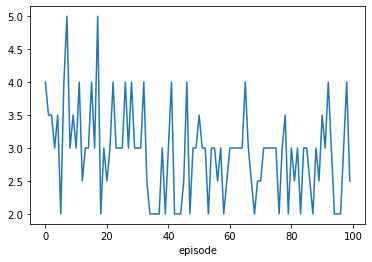

In [344]:
pd.pivot_table(df3,index='episode',columns='i',values='TotalNumberOFSteps').median(axis=1).head(100
                                                                                             ).plot()

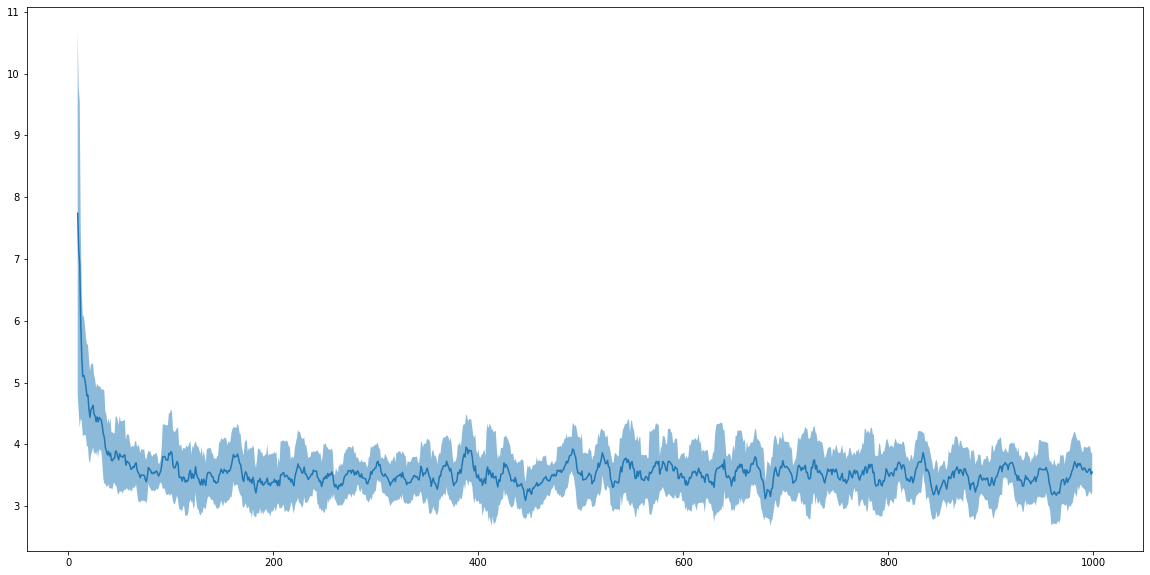

In [340]:
import pandas as pd
df3=pd.DataFrame(results).T
mean=pd.pivot_table(df3,index='episode',columns='i',values='TotalNumberOFSteps').mean(axis=1).rolling(10).mean()
standard_deviation=pd.pivot_table(df3,index='episode',columns='i',values='TotalNumberOFSteps').mean(axis=1).rolling(10).std()
plt.figure(figsize=(20,10))
plt.plot(mean)
plt.fill_between(mean.index, mean - standard_deviation, mean + standard_deviation,alpha=0.5)


In [319]:
import pprint as pprint
pprint.pprint(QT.Q_table)

{4: {((0, 0), (0, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 0), (0, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 0), (0, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 0), (0, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 0), (0, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 0), (0, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 0), (0, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 0), (0, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 0), (0, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 0), (0, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 0), (0, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 0), (0, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 0), (0, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 0), (0, 13)): {0: -9.219742365164905,
                         1: -9.731099532322396,
                         2: -8.65243762502571,
                         3: -9.218651493118786},
     ((0, 0), (0, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 0), (0, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 0), (1, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 0), (1, 1

     ((0, 1), (15, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 1), (15, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 1), (15, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 1), (15, 4)): {0: -11.03764365997608,
                         1: -10.63044098725722,
                         2: -10.978664122685167,
                         3: -10.985779185961407},
     ((0, 1), (15, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 1), (15, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 1), (15, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 1), (15, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 1), (15, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 1), (15, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 1), (15, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 1), (15, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 1), (15, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 1), (15, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 1), (15, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 2), (0, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 2), (0, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
 

     ((0, 3), (9, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 3), (9, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 3), (9, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 3), (10, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 3), (10, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 3), (10, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 3), (10, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 3), (10, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 3), (10, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 3), (10, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 3), (10, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 3), (10, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 3), (10, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 3), (10, 10)): {0: -10.090531075308242,
                          1: -9.934080032531288,
                          2: -9.723386651206807,
                          3: -10.173402888131886},
     ((0, 3), (10, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 3), (10, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 3), (10, 13)): {0: 0, 1: 0, 2: 0, 3: 0}

                         2: -5.965328961095862,
                         3: -7.077521114357813},
     ((0, 6), (3, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 6), (3, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 6), (3, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 6), (4, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 6), (4, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 6), (4, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 6), (4, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 6), (4, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 6), (4, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 6), (4, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 6), (4, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 6), (4, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 6), (4, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 6), (4, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 6), (4, 11)): {0: -6.068162956331346,
                         1: -5.952760107304034,
                         2: -5.958462843197463,
                         3: -6.625286746400963},
     ((0, 6), (4, 12

     ((0, 8), (2, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 8), (2, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 8), (3, 0)): {0: -7.920783307270611,
                        1: -7.419080193408682,
                        2: -8.42443609973779,
                        3: -7.30575531331062},
     ((0, 8), (3, 1)): {0: -7.146640881328086,
                        1: -6.742853858979443,
                        2: -7.702785919934229,
                        3: -6.611932262014674},
     ((0, 8), (3, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 8), (3, 3)): {0: -5.950521551566107,
                        1: -5.317762585430377,
                        2: -6.366456760155627,
                        3: -5.295840829165513},
     ((0, 8), (3, 4)): {0: -5.132231515237438,
                        1: -4.561787184575792,
                        2: -5.82836072995488,
                        3: -4.44280530946385},
     ((0, 8), (3, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 8), (3, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
 

     ((0, 10), (9, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 10), (10, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 10), (10, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 10), (10, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 10), (10, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 10), (10, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 10), (10, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 10), (10, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 10), (10, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 10), (10, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 10), (10, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 10), (10, 10)): {0: -7.425888607807721,
                           1: -6.764755449604873,
                           2: -7.962226522149546,
                           3: -7.963054159256738},
     ((0, 10), (10, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 10), (10, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 10), (10, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 10), (10, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 10), (10, 15)): {0: 

                          1: -3.750593611643624,
                          2: -4.910684424014248,
                          3: -5.275231800297301},
     ((0, 12), (6, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 12), (6, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 12), (6, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 12), (7, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 12), (7, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 12), (7, 2)): {0: -9.957785235577635,
                         1: -9.810842377229012,
                         2: -10.425456746495943,
                         3: -9.633551295330811},
     ((0, 12), (7, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 12), (7, 4)): {0: -9.215070719779451,
                         1: -9.069081374758067,
                         2: -8.845587267393057,
                         3: -8.859955373909198},
     ((0, 12), (7, 5)): {0: -8.530591154517628,
                         1: -8.276807922265974,
                         2: -8.516242896727313,
                  

     ((0, 14), (5, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 14), (5, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 14), (5, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 14), (5, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 14), (5, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 14), (5, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 14), (5, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 14), (6, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 14), (6, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 14), (6, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 14), (6, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 14), (6, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 14), (6, 5)): {0: -8.959271223965064,
                         1: -8.72659338678989,
                         2: -9.213555371413108,
                         3: -8.548674579947981},
     ((0, 14), (6, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 14), (6, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 14), (6, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((0, 14), (6, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
  

     ((1, 0), (14, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 0), (14, 3)): {0: -9.235953417871873,
                         1: -9.501717868245695,
                         2: -9.708335391569918,
                         3: -9.73970788821683},
     ((1, 0), (14, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 0), (14, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 0), (14, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 0), (14, 7)): {0: -11.141246342282548,
                         1: -10.74602603411902,
                         2: -10.363952987175313,
                         3: -10.605569837571819},
     ((1, 0), (14, 8)): {0: -11.773373522449505,
                         1: -11.612090749631928,
                         2: -11.726083404123731,
                         3: -11.663420743783806},
     ((1, 0), (14, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 0), (14, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 0), (14, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 0), (14, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 0)

     ((1, 3), (2, 11)): {0: -7.397545885274976,
                         1: -6.0681709428971615,
                         2: -6.068170939952759,
                         3: -7.426367663020823},
     ((1, 3), (2, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 3), (2, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 3), (2, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 3), (2, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 3), (3, 0)): {0: -4.5256961235266235,
                        1: -2.895368288323733,
                        2: -4.5499082794021595,
                        3: -2.895368280745247},
     ((1, 3), (3, 1)): {0: -3.494519826416176,
                        1: -1.9951249994574114,
                        2: -3.6342621213145367,
                        3: -1.9951287655734824},
     ((1, 3), (3, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 3), (3, 3)): {0: -1.9742364390684557,
                        1: -0.05000000000000468,
                        2: -1.9907851877064369,
                        3: -1

                         3: -9.15434578188926},
     ((1, 4), (12, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 4), (12, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 4), (12, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 4), (12, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 4), (12, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 4), (12, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 4), (12, 13)): {0: -11.968971852761438,
                          1: -11.51453532607714,
                          2: -11.42727773745754,
                          3: -11.77704901690424},
     ((1, 4), (12, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 4), (12, 15)): {0: -12.45377283420246,
                          1: -12.268814845075097,
                          2: -12.22823377581732,
                          3: -12.617378265071258},
     ((1, 4), (13, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 4), (13, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 4), (13, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 4), (13, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
 

     ((1, 6), (7, 5)): {0: -5.659881806589054,
                        1: -4.559637156595896,
                        2: -5.5456083043802185,
                        3: -4.563052918543629},
     ((1, 6), (7, 6)): {0: -5.322616207608345,
                        1: -3.7506003124999996,
                        2: -5.332769215304483,
                        3: -5.333132685411796},
     ((1, 6), (7, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 6), (7, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 6), (7, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 6), (7, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 6), (7, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 6), (7, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 6), (7, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 6), (7, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 6), (7, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 6), (8, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 6), (8, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 6), (8, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 6), (8, 3)): {0:

     ((1, 8), (2, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 8), (2, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 8), (2, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 8), (2, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 8), (3, 0)): {0: -7.887956916765464,
                        1: -6.764762265327372,
                        2: -8.044556265320153,
                        3: -6.764535347132526},
     ((1, 8), (3, 1)): {0: -6.900221669648527,
                        1: -6.068170888584952,
                        2: -7.409864657983793,
                        3: -6.067566185833977},
     ((1, 8), (3, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 8), (3, 3)): {0: -5.830875901635524,
                        1: -4.563069994605195,
                        2: -6.0375680338948365,
                        3: -4.561515173774961},
     ((1, 8), (3, 4)): {0: -5.085019709362708,
                        1: -3.7505947038591065,
                        2: -5.137786114157454,
                        3: -3.75037073364

     ((1, 10), (1, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 10), (1, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 10), (1, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 10), (1, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 10), (1, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 10), (1, 15)): {0: -4.563070296874999,
                          1: -4.563070296874998,
                          2: -2.8953687500000003,
                          3: -4.563070296874999},
     ((1, 10), (2, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 10), (2, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 10), (2, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 10), (2, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 10), (2, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 10), (2, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 10), (2, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 10), (2, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 10), (2, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 10), (2, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 10), (2, 10)): {0: 0, 1: 0, 2: 0, 3: 

                           3: -10.301567490968901},
     ((1, 11), (13, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 11), (13, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 11), (13, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 11), (13, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 11), (13, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 11), (13, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 11), (13, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 11), (13, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 11), (13, 8)): {0: -10.249901119163656,
                          1: -9.659624677549044,
                          2: -10.399074129854753,
                          3: -9.659570157337125},
     ((1, 11), (13, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 11), (13, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 11), (13, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 11), (13, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 11), (13, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 11), (13, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 11), (13, 15)): {0: 

                          3: -6.701488437187903},
     ((1, 13), (9, 12)): {0: -7.417974034384384,
                          1: -6.068170891460587,
                          2: -7.416709212713016,
                          3: -6.068170930499383},
     ((1, 13), (9, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 13), (9, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 13), (9, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 13), (10, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 13), (10, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 13), (10, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 13), (10, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 13), (10, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 13), (10, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 13), (10, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 13), (10, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 13), (10, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 13), (10, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 13), (10, 10)): {0: -8.233853862836604,
                           1: -7.6182037

     ((1, 15), (11, 11)): {0: -8.710338058221996,
                           1: -8.300731003715612,
                           2: -8.384993875467842,
                           3: -8.216136573283434},
     ((1, 15), (11, 12)): {0: -8.921177088459702,
                           1: -8.12499401533803,
                           2: -8.46881736226503,
                           3: -8.427327193477886},
     ((1, 15), (11, 13)): {0: -8.78461836197259,
                           1: -7.9280714906294785,
                           2: -8.49658074276507,
                           3: -8.034151055983028},
     ((1, 15), (11, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 15), (11, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 15), (12, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 15), (12, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 15), (12, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 15), (12, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((1, 15), (12, 4)): {0: -11.850030866836237,
                          1: -11.662925706

                         1: -10.249578017777258,
                         2: -9.219798807629722,
                         3: -10.263342619146608},
     ((2, 2), (2, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 2), (2, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 2), (2, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 2), (2, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 2), (2, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 2), (2, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 2), (2, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 2), (2, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 2), (2, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 2), (2, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 2), (2, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 2), (2, 11)): {0: -7.426519838252586,
                         1: -7.426524251998213,
                         2: -6.068170942929687,
                         3: -7.426521341253933},
     ((2, 2), (2, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 2), (2, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 2), (2, 14

     ((2, 4), (6, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 4), (6, 5)): {0: -4.528967118011293,
                        1: -2.8953366330160035,
                        2: -2.895368984567126,
                        3: -4.499406050333169},
     ((2, 4), (6, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 4), (6, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 4), (6, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 4), (6, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 4), (6, 10)): {0: -7.906391622169462,
                         1: -6.764463089268431,
                         2: -6.764705889122064,
                         3: -7.969195766199789},
     ((2, 4), (6, 11)): {0: -8.067191949584481,
                         1: -7.400224559484251,
                         2: -7.408535432152419,
                         3: -8.30274529220824},
     ((2, 4), (6, 12)): {0: -8.630024845125956,
                         1: -7.974013325381996,
                         2: -7.97016081049073,
                         3: -8.721578

                         3: -8.055198025928755},
     ((2, 6), (2, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 6), (2, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 6), (2, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 6), (2, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 6), (2, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 6), (2, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 6), (2, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 6), (2, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 6), (2, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 6), (2, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 6), (2, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 6), (2, 11)): {0: -4.563070296874999,
                         1: -4.563070296874999,
                         2: -2.8953687500000003,
                         3: -4.563070296875001},
     ((2, 6), (2, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 6), (2, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 6), (2, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 6), (2, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 6), (3,

     ((2, 8), (8, 12)): {0: -7.764275419215247,
                         1: -6.756968567730766,
                         2: -6.755542574894697,
                         3: -7.325157137388398},
     ((2, 8), (8, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 8), (8, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 8), (8, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 8), (9, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 8), (9, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 8), (9, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 8), (9, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 8), (9, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 8), (9, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 8), (9, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 8), (9, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 8), (9, 8)): {0: -6.068118163885867,
                        1: -4.563070296874997,
                        2: -6.0656900917698025,
                        3: -6.066898576081666},
     ((2, 8), (9, 9)): {0: -6.751049078664032,
                        1: -

                          2: -12.15404320583291,
                          3: -11.534746631365852},
     ((2, 10), (15, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 10), (15, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 10), (15, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 10), (15, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 10), (15, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 10), (15, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 10), (15, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 10), (15, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 10), (15, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 10), (15, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 10), (15, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 11), (0, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 11), (0, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 11), (0, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 11), (0, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 11), (0, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 11), (0, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 11), (0, 6)): {0: 0, 1:

                           2: -7.426072280251329,
                           3: -7.42651066209425},
     ((2, 12), (11, 13)): {0: -8.04455329609694,
                           1: -6.764760986520095,
                           2: -6.764762387926403,
                           3: -7.998156585062637},
     ((2, 12), (11, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 12), (11, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 12), (12, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 12), (12, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 12), (12, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 12), (12, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 12), (12, 4)): {0: -11.284467038707918,
                          1: -10.839590354559068,
                          2: -11.346100972330174,
                          3: -10.940120044052776},
     ((2, 12), (12, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 12), (12, 6)): {0: -10.786012934542669,
                          1: -10.000450183196424,
                          2: -10.5709957

                         3: -8.032672835871193},
     ((2, 15), (1, 5)): {0: -7.422580985756793,
                         1: -8.394396174390405,
                         2: -7.5278116381904265,
                         3: -7.4069784171581325},
     ((2, 15), (1, 6)): {0: -6.76458121139442,
                         1: -7.912362522922926,
                         2: -7.399013269017068,
                         3: -6.758939564583118},
     ((2, 15), (1, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 15), (1, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 15), (1, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 15), (1, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 15), (1, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 15), (1, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 15), (1, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 15), (1, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((2, 15), (1, 15)): {0: 1.0,
                          1: -1.0474999999999999,
                          2: -0.050000000000000044,
                       

     ((3, 1), (6, 10)): {0: -9.015141803099617,
                         1: -8.05476458222596,
                         2: -8.049107141104408,
                         3: -9.165535117128389},
     ((3, 1), (6, 11)): {0: -8.50175935268485,
                         1: -8.506439165682709,
                         2: -8.317007517390415,
                         3: -8.744503980571238},
     ((3, 1), (6, 12)): {0: -9.755822689843892,
                         1: -9.162639356462257,
                         2: -8.991508991784047,
                         3: -9.726246304532815},
     ((3, 1), (6, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 1), (6, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 1), (6, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 1), (7, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 1), (7, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 1), (7, 2)): {0: -4.523377531780968,
                        1: -2.89541670409286,
                        2: -2.8955925492161008,
                        3: -4.4813

                         1: -5.334916781977524,
                         2: -5.334916774599799,
                         3: -6.764317253994757},
     ((3, 4), (4, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 4), (4, 13)): {0: -8.031500648658671,
                         1: -6.764762392492308,
                         2: -6.764762332358757,
                         3: -8.051955367010965},
     ((3, 4), (4, 14)): {0: -8.629317683390592,
                         1: -7.426524275970637,
                         2: -7.426521470713928,
                         3: -8.648752836594369},
     ((3, 4), (4, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 4), (5, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 4), (5, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 4), (5, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 4), (5, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 4), (5, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 4), (5, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 4), (5, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 4), (5, 7)): {0:

                         1: -6.067591082943436,
                         2: -6.053331223068077,
                         3: -7.295865515268288},
     ((3, 6), (6, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 6), (6, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 6), (6, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 6), (7, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 6), (7, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 6), (7, 2)): {0: -6.757968952258604,
                        1: -5.334902806405127,
                        2: -6.752042004197482,
                        3: -5.334914575204149},
     ((3, 6), (7, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 6), (7, 4)): {0: -5.253234602820989,
                        1: -3.7501371519794766,
                        2: -5.290919341416179,
                        3: -3.7505856918175153},
     ((3, 6), (7, 5)): {0: -4.535072524022757,
                        1: -2.895368745008245,
                        2: -4.5211056458821,
                        3: -2.895368750

     ((3, 8), (2, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 8), (2, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 8), (2, 11)): {0: -1.9951250000000003,
                         1: -3.750599910963846,
                         2: -1.9951250000000003,
                         3: -3.7506003072946914},
     ((3, 8), (2, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 8), (2, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 8), (2, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 8), (2, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 8), (3, 0)): {0: -6.764762395782398,
                        1: -6.764762395765185,
                        2: -6.764762395783201,
                        3: -5.33491678203125},
     ((3, 8), (3, 1)): {0: -6.068170942928461,
                        1: -6.068170942929582,
                        2: -6.068170942928278,
                        3: -4.563070296875001},
     ((3, 8), (3, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 8), (3, 3)): {0: -4.563070296874468,
                        1: -4.56

                         1: -8.055197743584154,
                         2: -9.217625863280421,
                         3: -8.05519805157772},
     ((3, 9), (14, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 9), (14, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 9), (14, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 9), (14, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 9), (14, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 9), (14, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 9), (14, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 9), (15, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 9), (15, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 9), (15, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 9), (15, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 9), (15, 4)): {0: -11.481207271170167,
                         1: -10.654290144850801,
                         2: -11.375203735035297,
                         3: -10.725822285968317},
     ((3, 9), (15, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 9), (15, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
   

     ((3, 11), (15, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 11), (15, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 11), (15, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 11), (15, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 11), (15, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 12), (0, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 12), (0, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 12), (0, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 12), (0, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 12), (0, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 12), (0, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 12), (0, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 12), (0, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 12), (0, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 12), (0, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 12), (0, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 12), (0, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 12), (0, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 12), (0, 13)): {0: -1.9951250000000003,
                          1: -3.75059

                          1: -3.7465851936152967,
                          2: -4.378583852199688,
                          3: -3.7411478655998485},
     ((3, 14), (6, 12)): {0: -4.281915509795021,
                          1: -2.8945690257361063,
                          2: -3.9486801507912275,
                          3: -2.894937373520444},
     ((3, 14), (6, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 14), (6, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 14), (6, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 14), (7, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 14), (7, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 14), (7, 2)): {0: -10.550615933983305,
                         1: -9.994000315435368,
                         2: -10.615217770276073,
                         3: -9.945886639093215},
     ((3, 14), (7, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((3, 14), (7, 4)): {0: -9.08869452621601,
                         1: -8.950389164119493,
                         2: -8.759140975172375,
          

     ((4, 0), (4, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 0), (4, 13)): {0: -9.693481571781941,
                         1: -9.743512078470298,
                         2: -8.65243578013807,
                         3: -9.219794561674913},
     ((4, 0), (4, 14)): {0: -10.220516121860772,
                         1: -10.142807240259115,
                         2: -9.219816154236012,
                         3: -9.758803584717175},
     ((4, 0), (4, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 0), (5, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 0), (5, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 0), (5, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 0), (5, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 0), (5, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 0), (5, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 0), (5, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 0), (5, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 0), (5, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 0), (5, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 0), (5, 10)):

     ((4, 2), (0, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 2), (0, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 2), (0, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 2), (0, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 2), (0, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 2), (0, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 2), (0, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 2), (0, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 2), (0, 13)): {0: -9.755746492286576,
                         1: -10.66304466542761,
                         2: -9.729529852708161,
                         3: -10.621952761712489},
     ((4, 2), (0, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 2), (0, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 2), (1, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 2), (1, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 2), (1, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 2), (1, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 2), (1, 4)): {0: -2.89536872114505,
                        1: -4.548554040664653,
                      

     ((4, 3), (13, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 3), (13, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 3), (13, 8)): {0: -9.68899957648805,
                         1: -9.027832287114226,
                         2: -9.092696766086583,
                         3: -9.660606669105803},
     ((4, 3), (13, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 3), (13, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 3), (13, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 3), (13, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 3), (13, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 3), (13, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 3), (13, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 3), (14, 0)): {0: -9.754605110099796,
                         1: -8.65234632475729,
                         2: -9.744123714435887,
                         3: -8.652409459932834},
     ((4, 3), (14, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 3), (14, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 3), (14, 3)): {0: -8.055198009088656,
            

     ((4, 6), (1, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 6), (1, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 6), (1, 4)): {0: -2.8953687500000003,
                        1: -4.560090900144703,
                        2: -4.554528116869447,
                        3: -2.8953687499978606},
     ((4, 6), (1, 5)): {0: -1.9951249999999998,
                        1: -3.750598487746122,
                        2: -3.7505995853301686,
                        3: -1.9951250000000003},
     ((4, 6), (1, 6)): {0: -1.0475000000000003,
                        1: -2.8953687500000003,
                        2: -2.8953687499999994,
                        3: -2.8953687500000003},
     ((4, 6), (1, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 6), (1, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 6), (1, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 6), (1, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 6), (1, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 6), (1, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 6), (1, 13)): {0: 0

     ((4, 8), (9, 12)): {0: -7.42470851930881,
                         1: -6.068170940737199,
                         2: -6.068170940642587,
                         3: -7.4247327281786735},
     ((4, 8), (9, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 8), (9, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 8), (9, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 8), (10, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 8), (10, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 8), (10, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 8), (10, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 8), (10, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 8), (10, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 8), (10, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 8), (10, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 8), (10, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 8), (10, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 8), (10, 10)): {0: -6.744099435862653,
                          1: -5.3347328440500945,
                          2: -5.334899676489586,
         

                          2: -1.9951250000000003,
                          3: -3.750600312499996},
     ((4, 10), (4, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 10), (5, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 10), (5, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 10), (5, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 10), (5, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 10), (5, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 10), (5, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 10), (5, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 10), (5, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 10), (5, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 10), (5, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 10), (5, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 10), (5, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 10), (5, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 10), (5, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 10), (5, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 10), (5, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 10), (6, 0)): {0: 0, 1: 0, 2: 0, 

                          3: -10.984085301303182},
     ((4, 11), (15, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 11), (15, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 11), (15, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 11), (15, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 11), (15, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 11), (15, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 11), (15, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 11), (15, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 11), (15, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 11), (15, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 11), (15, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 12), (0, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 12), (0, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 12), (0, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 12), (0, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 12), (0, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 12), (0, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 12), (0, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 12), (0, 7)): {0: 0, 1

     ((4, 14), (5, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 14), (5, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 14), (5, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 14), (5, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 14), (5, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 14), (5, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 14), (5, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 14), (5, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 14), (5, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 14), (5, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 14), (5, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 14), (5, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 14), (6, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 14), (6, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 14), (6, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 14), (6, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 14), (6, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((4, 14), (6, 5)): {0: -8.234873606130321,
                         1: -7.424999201099086,
                         2: -8.535332156184658,


     ((5, 0), (4, 13)): {0: -9.219790141665651,
                         1: -10.115396362095861,
                         2: -9.2138432164993,
                         3: -9.749763773213093},
     ((5, 0), (4, 14)): {0: -9.758563652647773,
                         1: -10.563705100378085,
                         2: -9.70525862494748,
                         3: -10.170341384117249},
     ((5, 0), (4, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 0), (5, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 0), (5, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 0), (5, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 0), (5, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 0), (5, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 0), (5, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 0), (5, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 0), (5, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 0), (5, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 0), (5, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 0), (5, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 0), (5, 11)): 

     ((5, 2), (0, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 2), (0, 13)): {0: -10.238083383512109,
                         1: -10.999514183588289,
                         2: -10.22132047881771,
                         3: -11.078768031727813},
     ((5, 2), (0, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 2), (0, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 2), (1, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 2), (1, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 2), (1, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 2), (1, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 2), (1, 4)): {0: -3.75057784035545,
                        1: -5.282446509910804,
                        2: -3.7506003047298737,
                        3: -5.315026467963217},
     ((5, 2), (1, 5)): {0: -4.562912108476725,
                        1: -6.0321386283966305,
                        2: -4.563066955702041,
                        3: -5.981629771715497},
     ((5, 2), (1, 6)): {0: -5.3335235592122245,
                        1: -6.6

                          3: -11.235421508181402},
     ((5, 3), (12, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 3), (12, 15)): {0: -12.048600057669816,
                          1: -11.596158865956216,
                          2: -11.556586024264647,
                          3: -12.218162222764187},
     ((5, 3), (13, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 3), (13, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 3), (13, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 3), (13, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 3), (13, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 3), (13, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 3), (13, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 3), (13, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 3), (13, 8)): {0: -9.476567665838948,
                         1: -8.588606942426274,
                         2: -8.598295852017364,
                         3: -9.522403111349735},
     ((5, 3), (13, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 3), (13, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
   

     ((5, 5), (10, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 5), (10, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 5), (10, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 5), (10, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 5), (10, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 5), (11, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 5), (11, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 5), (11, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 5), (11, 3)): {0: -6.764756791313156,
                         1: -5.334916782031225,
                         2: -6.7646573508781636,
                         3: -5.33491678203125},
     ((5, 5), (11, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 5), (11, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 5), (11, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 5), (11, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 5), (11, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 5), (11, 9)): {0: -7.9495019347747675,
                         1: -6.759228812018462,
                         2: -6.762658980144739,
       

     ((5, 7), (6, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 7), (6, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 7), (6, 5)): {0: -2.887798402794454,
                        1: -1.0475000000000003,
                        2: -2.8712800876147924,
                        3: -1.0475000000000003},
     ((5, 7), (6, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 7), (6, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 7), (6, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 7), (6, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 7), (6, 10)): {0: -3.750390580956606,
                         1: -1.9951250000000003,
                         2: -1.9951250000000003,
                         3: -3.7505997215359423},
     ((5, 7), (6, 11)): {0: -4.557928388773022,
                         1: -2.89536874999836,
                         2: -2.8953687500000003,
                         3: -4.5615546631747375},
     ((5, 7), (6, 12)): {0: -5.331350742910169,
                         1: -3.7506003124999996,
                         2:

                         3: -8.051169906472794},
     ((5, 9), (2, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 9), (2, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 9), (2, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 9), (2, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 9), (2, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 9), (2, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 9), (2, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 9), (2, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 9), (2, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 9), (2, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 9), (2, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 9), (2, 11)): {0: -2.8953687500000003,
                         1: -4.563070291685147,
                         2: -2.8953687500000003,
                         3: -4.56305709811025},
     ((5, 9), (2, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 9), (2, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 9), (2, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 9), (2, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 9), (3,

     ((5, 10), (13, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 10), (13, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 10), (13, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 10), (13, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 10), (14, 0)): {0: -11.964401412496873,
                          1: -11.576834903998524,
                          2: -12.22004906732731,
                          3: -11.632359447774459},
     ((5, 10), (14, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 10), (14, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 10), (14, 3)): {0: -10.861796217039611,
                          1: -10.248978262863591,
                          2: -11.066402823472067,
                          3: -10.231490558804317},
     ((5, 10), (14, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 10), (14, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 10), (14, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 10), (14, 7)): {0: -9.16738724771503,
                          1: -8.048836743262473,
                          2: -9.0134905

                          3: -1.9951227656319364},
     ((5, 13), (4, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 13), (5, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 13), (5, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 13), (5, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 13), (5, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 13), (5, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 13), (5, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 13), (5, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 13), (5, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 13), (5, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 13), (5, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 13), (5, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 13), (5, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 13), (5, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 13), (5, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 13), (5, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 13), (5, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 13), (6, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 13), (6, 1)): {0: 0, 1: 0, 2: 0,

     ((5, 15), (0, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 15), (0, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 15), (0, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 15), (0, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 15), (0, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 15), (0, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 15), (0, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 15), (0, 13)): {0: -4.5629943541083255,
                          1: -5.952533285101381,
                          2: -5.319091743930706,
                          3: -4.563058070169834},
     ((5, 15), (0, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 15), (0, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 15), (1, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 15), (1, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 15), (1, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 15), (1, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((5, 15), (1, 4)): {0: -9.577387001222265,
                         1: -10.193949766884108,
                         2: -9.90668740086819,
   

     ((6, 0), (11, 10)): {0: -9.864922388031285,
                          1: -9.257088334842807,
                          2: -9.36997819091534,
                          3: -9.375421789328897},
     ((6, 0), (11, 11)): {0: -10.397604671909201,
                          1: -10.0234771643314,
                          2: -10.058697587071494,
                          3: -10.221329452253745},
     ((6, 0), (11, 12)): {0: -10.766160891593401,
                          1: -10.381019909296377,
                          2: -10.221271435296154,
                          3: -10.192023953015939},
     ((6, 0), (11, 13)): {0: -11.08903693554873,
                          1: -10.744249510880834,
                          2: -10.683658085438246,
                          3: -10.880646359053383},
     ((6, 0), (11, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 0), (11, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 0), (12, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 0), (12, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
  

                        2: -6.754218317340238,
                        3: -7.903322765979165},
     ((6, 2), (9, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 2), (9, 11)): {0: -9.024005965133014,
                         1: -8.022068778027352,
                         2: -8.018552400636601,
                         3: -9.095219199399097},
     ((6, 2), (9, 12)): {0: -9.742804823658808,
                         1: -8.652383315980806,
                         2: -8.652370417956904,
                         3: -9.745422610548998},
     ((6, 2), (9, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 2), (9, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 2), (9, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 2), (10, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 2), (10, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 2), (10, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 2), (10, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 2), (10, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 2), (10, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 2), (10, 

     ((6, 4), (9, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 4), (9, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 4), (9, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 4), (9, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 4), (9, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 4), (9, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 4), (9, 8)): {0: -6.0169888438345325,
                        1: -4.563026872355023,
                        2: -4.563015524238349,
                        3: -6.008042815155711},
     ((6, 4), (9, 9)): {0: -6.662767098467597,
                        1: -5.334287257850099,
                        2: -5.33482295357917,
                        3: -6.708317225593162},
     ((6, 4), (9, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 4), (9, 11)): {0: -7.962495839496833,
                         1: -6.764073821237185,
                         2: -6.764565412930422,
                         3: -7.968403734238894},
     ((6, 4), (9, 12)): {0: -8.644981505281606,
                         1: -7.426524

     ((6, 6), (4, 13)): {0: -6.06817094292772,
                         1: -7.424513400385093,
                         2: -6.068170931299788,
                         3: -7.424373720496405},
     ((6, 6), (4, 14)): {0: -6.764762394022661,
                         1: -8.04694971378619,
                         2: -6.764761588823133,
                         3: -8.05448147870052},
     ((6, 6), (4, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 6), (5, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 6), (5, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 6), (5, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 6), (5, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 6), (5, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 6), (5, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 6), (5, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 6), (5, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 6), (5, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 6), (5, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 6), (5, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 6), (5, 11)): {0:

                        1: -8.645727200668412,
                        2: -8.652177043789472,
                        3: -7.426523300753072},
     ((6, 8), (3, 1)): {0: -6.764759353665862,
                        1: -8.046662916218647,
                        2: -7.948832726674516,
                        3: -6.76473157570563},
     ((6, 8), (3, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 8), (3, 3)): {0: -5.334916779892475,
                        1: -6.752771110635399,
                        2: -6.753916749947424,
                        3: -5.334916658905203},
     ((6, 8), (3, 4)): {0: -4.563070296777248,
                        1: -6.06205151055548,
                        2: -6.06587011169957,
                        3: -4.563070213654083},
     ((6, 8), (3, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 8), (3, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 8), (3, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 8), (3, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 8), (3, 9)): {0: 0, 1: 0, 2: 0, 3: 0},


     ((6, 9), (12, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 9), (12, 15)): {0: -9.218176761339336,
                          1: -8.055190142928202,
                          2: -8.055180140313874,
                          3: -9.219001788534335},
     ((6, 9), (13, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 9), (13, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 9), (13, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 9), (13, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 9), (13, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 9), (13, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 9), (13, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 9), (13, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 9), (13, 8)): {0: -6.763694125908714,
                         1: -5.334916781800521,
                         2: -6.762390146187919,
                         3: -5.334916782031216},
     ((6, 9), (13, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 9), (13, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 9), (13, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((

     ((6, 11), (12, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 11), (12, 15)): {0: -8.049173099435633,
                           1: -6.764758326142686,
                           2: -6.764761073969486,
                           3: -8.030397552639986},
     ((6, 11), (13, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 11), (13, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 11), (13, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 11), (13, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 11), (13, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 11), (13, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 11), (13, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 11), (13, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 11), (13, 8)): {0: -7.701888596288061,
                          1: -6.759550118021432,
                          2: -7.620160235571046,
                          3: -6.763873023199082},
     ((6, 11), (13, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 11), (13, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 11), (13, 11)): {0: 0, 1: 0, 

     ((6, 13), (9, 9)): {0: -5.972951335682398,
                         1: -4.55867867496245,
                         2: -5.7118588829864105,
                         3: -4.561932821984072},
     ((6, 13), (9, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 13), (9, 11)): {0: -4.363442017267007,
                          1: -2.8951542087398208,
                          2: -4.331451094912073,
                          3: -2.895367397464903},
     ((6, 13), (9, 12)): {0: -3.7505980355863278,
                          1: -1.9951250000000003,
                          2: -3.750573144726716,
                          3: -1.9951250000000003},
     ((6, 13), (9, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 13), (9, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 13), (9, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 13), (10, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 13), (10, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 13), (10, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 13), (10, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
 

     ((6, 15), (4, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 15), (4, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 15), (4, 11)): {0: -3.7466736367480236,
                          1: -4.843286066713743,
                          2: -4.450410412074393,
                          3: -3.7495541110205144},
     ((6, 15), (4, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 15), (4, 13)): {0: -1.995379131778496,
                          1: -3.4205853326454876,
                          2: -2.8906053068501683,
                          3: -1.995122792017277},
     ((6, 15), (4, 14)): {0: -1.0475000000203698,
                          1: -2.8897098492118944,
                          2: -1.9951232314183482,
                          3: -1.0475000000000003},
     ((6, 15), (4, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 15), (5, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 15), (5, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 15), (5, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((6, 15), (5, 3)): {0: 0, 1: 0, 2: 0, 3: 0}

                        2: -6.7606304286769445,
                        3: -7.613959353310021},
     ((7, 1), (1, 6)): {0: -7.354393025503713,
                        1: -8.239934882809266,
                        2: -7.374737829599818,
                        3: -8.084118399360042},
     ((7, 1), (1, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 1), (1, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 1), (1, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 1), (1, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 1), (1, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 1), (1, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 1), (1, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 1), (1, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 1), (1, 15)): {0: -11.903030919545397,
                         1: -12.383051759123648,
                         2: -11.88721354935129,
                         3: -12.476171654522375},
     ((7, 1), (2, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 1), (2, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 1), (2, 2)): {

     ((7, 2), (12, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 2), (12, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 2), (12, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 2), (12, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 2), (12, 13)): {0: -10.457964221147767,
                          1: -10.212408354113474,
                          2: -10.094762631827827,
                          3: -10.673558479423615},
     ((7, 2), (12, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 2), (12, 15)): {0: -11.621234079146815,
                          1: -11.134576715387375,
                          2: -11.19338653772099,
                          3: -11.849081053222523},
     ((7, 2), (13, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 2), (13, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 2), (13, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 2), (13, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 2), (13, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 2), (13, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 2), (13, 6)): {0: 0, 1: 0, 2: 0, 3:

     ((7, 4), (7, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 4), (7, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 4), (8, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 4), (8, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 4), (8, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 4), (8, 3)): {0: -1.9947494601521498,
                        1: -0.050000000000000044,
                        2: -1.995121732781246,
                        3: -0.050000000000000044},
     ((7, 4), (8, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 4), (8, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 4), (8, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 4), (8, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 4), (8, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 4), (8, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 4), (8, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 4), (8, 11)): {0: -6.760141413977677,
                         1: -5.334916782031445,
                         2: -5.334916782028548,
                         3: -6.764742009544399},
     ((7, 4), (8, 12

                         2: -5.33491476645375,
                         3: -6.752313329968019},
     ((7, 6), (4, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 6), (4, 13)): {0: -6.764762345774506,
                         1: -8.005405570961504,
                         2: -6.764759305445108,
                         3: -8.041176027254863},
     ((7, 6), (4, 14)): {0: -7.426520238857494,
                         1: -8.636483035233681,
                         2: -7.4264832160874965,
                         3: -8.64115466690364},
     ((7, 6), (4, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 6), (5, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 6), (5, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 6), (5, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 6), (5, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 6), (5, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 6), (5, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 6), (5, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 6), (5, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 6), (5, 8)): {0:

     ((7, 7), (14, 7)): {0: -6.068170942929685,
                         1: -4.563070296874999,
                         2: -6.0681709429283615,
                         3: -6.068170942921158},
     ((7, 7), (14, 8)): {0: -6.764705987335235,
                         1: -5.334916782031227,
                         2: -5.334916782031112,
                         3: -6.764746050837383},
     ((7, 7), (14, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 7), (14, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 7), (14, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 7), (14, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 7), (14, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 7), (14, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 7), (14, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 7), (15, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 7), (15, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 7), (15, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 7), (15, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 7), (15, 4)): {0: -8.64996606139865,
          

                         2: -1.0475000000000003,
                         3: -2.895264043185328},
     ((7, 9), (8, 12)): {0: -3.7488533858970348,
                         1: -1.9951250000000003,
                         2: -1.9951249999999998,
                         3: -3.7496890101273266},
     ((7, 9), (8, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 9), (8, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 9), (8, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 9), (9, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 9), (9, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 9), (9, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 9), (9, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 9), (9, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 9), (9, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 9), (9, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 9), (9, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 9), (9, 8)): {0: -2.895350292391743,
                        1: -1.0475000000000003,
                        2: -2.872849549281537,
                     

     ((7, 11), (3, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 11), (4, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 11), (4, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 11), (4, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 11), (4, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 11), (4, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 11), (4, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 11), (4, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 11), (4, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 11), (4, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 11), (4, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 11), (4, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 11), (4, 11)): {0: -1.0475000000000003,
                          1: -2.8953687499135317,
                          2: -2.895368749999987,
                          3: -2.8953687499999994},
     ((7, 11), (4, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 11), (4, 13)): {0: -2.8953687500012255,
                          1: -4.55947606748728,
                          2: -2.895368749999978,


     ((7, 13), (0, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 13), (0, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 13), (0, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 13), (0, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 13), (0, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 13), (0, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 13), (0, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 13), (0, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 13), (0, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 13), (0, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 13), (0, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 13), (0, 13)): {0: -4.563070296875001,
                          1: -6.068170942929656,
                          2: -6.068170942751003,
                          3: -6.068170942929685},
     ((7, 13), (0, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 13), (0, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 13), (1, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 13), (1, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 13), (1, 2)): {0: 0, 1: 0, 2: 0, 3: 0}

     ((7, 14), (12, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 14), (12, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 14), (12, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 14), (12, 4)): {0: -9.617344502237383,
                          1: -9.645946935854354,
                          2: -10.105656193268587,
                          3: -9.436210575158759},
     ((7, 14), (12, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 14), (12, 6)): {0: -9.262637529996667,
                          1: -8.561499639060447,
                          2: -8.98833416102006,
                          3: -8.403297704065402},
     ((7, 14), (12, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 14), (12, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 14), (12, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 14), (12, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 14), (12, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 14), (12, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((7, 14), (12, 13)): {0: -5.332896835892878,
                           1: -3.7506003124

     ((8, 0), (6, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 0), (6, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 0), (6, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 0), (7, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 0), (7, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 0), (7, 2)): {0: -1.047477030233147,
                        1: -2.6131560635633932,
                        2: -1.0474997158029264,
                        3: -1.937230083442525},
     ((8, 0), (7, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 0), (7, 4)): {0: -2.8953624906687008,
                        1: -4.450992991920121,
                        2: -2.89495164761132,
                        3: -3.729003120328716},
     ((8, 0), (7, 5)): {0: -3.721665368104063,
                        1: -4.7472184675934495,
                        2: -3.7487959930306585,
                        3: -4.365183331797962},
     ((8, 0), (7, 6)): {0: -4.562520526542278,
                        1: -5.699760420623052,
                        2: -4.55682560

     ((8, 2), (1, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 2), (1, 4)): {0: -6.067175502844642,
                        1: -7.4166614052885755,
                        2: -6.0681709329441205,
                        3: -7.3587412672299255},
     ((8, 2), (1, 5)): {0: -6.763699810805345,
                        1: -7.988542964356258,
                        2: -6.764541971462545,
                        3: -7.906470331534037},
     ((8, 2), (1, 6)): {0: -7.411570010951665,
                        1: -8.545534192332441,
                        2: -7.419669563498645,
                        3: -8.01929719280248},
     ((8, 2), (1, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 2), (1, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 2), (1, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 2), (1, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 2), (1, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 2), (1, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 2), (1, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 2), (1, 14)): {0: 0, 1: 0

                         3: -8.055117086211645},
     ((8, 3), (9, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 3), (9, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 3), (9, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 3), (10, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 3), (10, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 3), (10, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 3), (10, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 3), (10, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 3), (10, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 3), (10, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 3), (10, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 3), (10, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 3), (10, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 3), (10, 10)): {0: -7.302846467020721,
                          1: -6.068170177540461,
                          2: -6.068170031711752,
                          3: -7.358594302617654},
     ((8, 3), (10, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 3), (10, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
  

     ((8, 5), (3, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 5), (3, 3)): {0: -4.563070294849228,
                        1: -6.067715815061097,
                        2: -5.984918645559561,
                        3: -4.563070296874684},
     ((8, 5), (3, 4)): {0: -3.7506003124999996,
                        1: -5.331499311669903,
                        2: -5.33463159589968,
                        3: -3.7506003125000005},
     ((8, 5), (3, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 5), (3, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 5), (3, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 5), (3, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 5), (3, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 5), (3, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 5), (3, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 5), (3, 12)): {0: -8.054773661148666,
                         1: -9.013721639687262,
                         2: -8.054484242469181,
                         3: -8.850607048394542},
     ((8, 5), (3, 13)): {0: 0, 1: 

                         1: -8.055193785105896,
                         2: -9.206581652613634,
                         3: -8.055191003580592},
     ((8, 6), (14, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 6), (14, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 6), (14, 3)): {0: -7.424805387976812,
                         1: -6.068170937101554,
                         2: -7.424910804047455,
                         3: -6.068170875270301},
     ((8, 6), (14, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 6), (14, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 6), (14, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 6), (14, 7)): {0: -6.068160554823963,
                         1: -4.563070296874999,
                         2: -4.563070296874999,
                         3: -6.068169413696642},
     ((8, 6), (14, 8)): {0: -6.764722090280586,
                         1: -5.334916296549245,
                         2: -5.334916782031032,
                         3: -6.762119726020835},
     ((8, 6), (14, 9)): {0

     ((8, 8), (8, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 8), (8, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 8), (8, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 8), (8, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 8), (8, 11)): {0: -2.895368749999991,
                         1: -2.89536874999997,
                         2: -1.0475000000000003,
                         3: -2.89536875038337},
     ((8, 8), (8, 12)): {0: -3.7506003123577623,
                         1: -3.7506003124999987,
                         2: -1.9951250000000003,
                         3: -3.7506003124999},
     ((8, 8), (8, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 8), (8, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 8), (8, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 8), (9, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 8), (9, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 8), (9, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 8), (9, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 8), (9, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 8), (9, 5)):

     ((8, 10), (13, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 10), (13, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 10), (13, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 10), (13, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 10), (13, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 10), (13, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 10), (14, 0)): {0: -11.208924130660076,
                          1: -10.268039845671272,
                          2: -11.11947805870544,
                          3: -10.269280418893189},
     ((8, 10), (14, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 10), (14, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 10), (14, 3)): {0: -9.719848658210356,
                          1: -8.651005625843787,
                          2: -9.690089657081117,
                          3: -8.649366237228104},
     ((8, 10), (14, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 10), (14, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 10), (14, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 10), (14, 7)): {0: -7.4177

                          3: -0.050000000000000044},
     ((8, 12), (9, 12)): {0: -1.0475000000000003,
                          1: 1.0,
                          2: -1.0475000000000003,
                          3: -1.0474999999999999},
     ((8, 12), (9, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 12), (9, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 12), (9, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 12), (10, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 12), (10, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 12), (10, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 12), (10, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 12), (10, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 12), (10, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 12), (10, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 12), (10, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 12), (10, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 12), (10, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 12), (10, 10)): {0: -3.7220775175887315,
                           1: -1.995125000001082

     ((8, 14), (15, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 15), (0, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 15), (0, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 15), (0, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 15), (0, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 15), (0, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 15), (0, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 15), (0, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 15), (0, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 15), (0, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 15), (0, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 15), (0, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 15), (0, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 15), (0, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 15), (0, 13)): {0: -6.763441150765244,
                          1: -7.8453781172036425,
                          2: -7.422537818680656,
                          3: -6.7647556524429735},
     ((8, 15), (0, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((8, 15), (0, 15)): {0: 0, 1: 0, 2: 0, 3

     ((9, 0), (9, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 0), (10, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 0), (10, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 0), (10, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 0), (10, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 0), (10, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 0), (10, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 0), (10, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 0), (10, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 0), (10, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 0), (10, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 0), (10, 10)): {0: -7.780086005957778,
                          1: -7.419674764988331,
                          2: -7.42356399255709,
                          3: -8.014579580045611},
     ((9, 0), (10, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 0), (10, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 0), (10, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 0), (10, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 0), (10, 15)): {0: 0, 1: 0, 2: 0, 3: 0},

                         3: -10.888159393267},
     ((9, 2), (4, 14)): {0: -10.50224553246437,
                         1: -10.969521970499361,
                         2: -10.550179209766261,
                         3: -11.084606319013798},
     ((9, 2), (4, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 2), (5, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 2), (5, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 2), (5, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 2), (5, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 2), (5, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 2), (5, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 2), (5, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 2), (5, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 2), (5, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 2), (5, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 2), (5, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 2), (5, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 2), (5, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 2), (5, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 2), (5,

                         2: -6.764533140934548,
                         3: -5.334916782026935},
     ((9, 3), (14, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 3), (14, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 3), (14, 3)): {0: -4.563070296874999,
                         1: -2.8953687500000003,
                         2: -4.563070296874999,
                         3: -4.563070296874997},
     ((9, 3), (14, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 3), (14, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 3), (14, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 3), (14, 7)): {0: -7.12214924425067,
                         1: -6.066494004823809,
                         2: -6.06811519073824,
                         3: -7.258092720314282},
     ((9, 3), (14, 8)): {0: -7.970935654210364,
                         1: -6.757196591785592,
                         2: -6.761655172332178,
                         3: -8.020045865117709},
     ((9, 3), (14, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 3), (14, 10)): 

                        2: -1.0475000000000003,
                        3: -2.895368749650981},
     ((9, 5), (9, 9)): {0: -3.7506003340725673,
                        1: -3.7506003079298047,
                        2: -1.9951250000000003,
                        3: -3.750600318208088},
     ((9, 5), (9, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 5), (9, 11)): {0: -5.334916771596783,
                         1: -5.334916590061393,
                         2: -3.7506003125000005,
                         3: -5.334916779762107},
     ((9, 5), (9, 12)): {0: -6.068170942929685,
                         1: -6.068170942929685,
                         2: -4.563070296875001,
                         3: -6.068170942929687},
     ((9, 5), (9, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 5), (9, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 5), (9, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 5), (10, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 5), (10, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 5), (10, 2)): {

                         2: -1.995124999999989,
                         3: -3.742342864231456},
     ((9, 7), (11, 10)): {0: -4.48197846322323,
                          1: -2.895368750001013,
                          2: -2.8953687499999634,
                          3: -4.563056287690418},
     ((9, 7), (11, 11)): {0: -5.334640555257666,
                          1: -3.750600312498129,
                          2: -3.750600312499561,
                          3: -5.331576801923706},
     ((9, 7), (11, 12)): {0: -6.063724901767996,
                          1: -4.563070296387362,
                          2: -4.5630702950191715,
                          3: -6.0669149135837515},
     ((9, 7), (11, 13)): {0: -6.763994401124562,
                          1: -5.334916781236793,
                          2: -5.334916178875084,
                          3: -6.7551082283709825},
     ((9, 7), (11, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 7), (11, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 

     ((9, 10), (3, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 10), (3, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 10), (3, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 10), (3, 12)): {0: -5.334916781811224,
                          1: -6.763118602972126,
                          2: -5.334916781614347,
                          3: -6.753319571517595},
     ((9, 10), (3, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 10), (3, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 10), (3, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 10), (4, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 10), (4, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 10), (4, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 10), (4, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 10), (4, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 10), (4, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 10), (4, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 10), (4, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 10), (4, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 10), (4, 9)): {0: 0, 1: 0, 2: 0, 3: 0}

     ((9, 11), (14, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 11), (14, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 11), (14, 3)): {0: -9.708380116514638,
                          1: -8.641581762002868,
                          2: -9.709348162609093,
                          3: -8.645191550559439},
     ((9, 11), (14, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 11), (14, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 11), (14, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 11), (14, 7)): {0: -7.377816053226143,
                          1: -6.068144323350316,
                          2: -7.407681420924472,
                          3: -6.068061997194233},
     ((9, 11), (14, 8)): {0: -6.73743726336723,
                          1: -5.33491613249671,
                          2: -6.708757482771497,
                          3: -5.3349157317825115},
     ((9, 11), (14, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 11), (14, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 11), (14, 11)): {0: 0, 1: 0, 2: 0, 3: 0},


                         1: -3.749742897169866,
                         2: -3.7504875750671927,
                         3: -1.9951250000000003},
     ((9, 13), (9, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 13), (9, 11)): {0: -1.9949409804110823,
                          1: -1.9940967815030723,
                          2: -1.9930393102151949,
                          3: -0.050000000000000044},
     ((9, 13), (9, 12)): {0: -1.0474999985445024,
                          1: -1.0475000028397865,
                          2: -1.0475000000147525,
                          3: 1.0},
     ((9, 13), (9, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 13), (9, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 13), (9, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 13), (10, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 13), (10, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 13), (10, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 13), (10, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 13), (10, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     (

     ((9, 15), (2, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 15), (3, 0)): {0: -12.080189266687501,
                         1: -12.644824827304824,
                         2: -12.267771939521872,
                         3: -12.263669240201363},
     ((9, 15), (3, 1)): {0: -11.358282568692612,
                         1: -11.91453150887618,
                         2: -11.678986299730884,
                         3: -11.25325156315677},
     ((9, 15), (3, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 15), (3, 3)): {0: -10.338070909704165,
                         1: -11.144791063430652,
                         2: -10.797767480743193,
                         3: -10.841841853138344},
     ((9, 15), (3, 4)): {0: -10.143793574287344,
                         1: -10.176137868687537,
                         2: -10.137250921312493,
                         3: -10.134445134440245},
     ((9, 15), (3, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 15), (3, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((9, 15)

     ((10, 0), (12, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 0), (12, 13)): {0: -10.511044199412453,
                           1: -9.74343906813171,
                           2: -9.755540805267373,
                           3: -10.17768551120179},
     ((10, 0), (12, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 0), (12, 15)): {0: -11.326689298643782,
                           1: -10.754300445837687,
                           2: -10.744170427619832,
                           3: -11.072396926616857},
     ((10, 0), (13, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 0), (13, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 0), (13, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 0), (13, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 0), (13, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 0), (13, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 0), (13, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 0), (13, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 0), (13, 8)): {0: -8.33130374167706,
                          1: -7.22

     ((10, 2), (8, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 2), (8, 11)): {0: -7.426490142767895,
                          1: -8.48920783546708,
                          2: -7.425832828109311,
                          3: -8.632860304921687},
     ((10, 2), (8, 12)): {0: -8.05499209012055,
                          1: -9.131886875012533,
                          2: -8.05188793022819,
                          3: -9.139504692890942},
     ((10, 2), (8, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 2), (8, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 2), (8, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 2), (9, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 2), (9, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 2), (9, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 2), (9, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 2), (9, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 2), (9, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 2), (9, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 2), (9, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     

     ((10, 4), (3, 0)): {0: -7.4264579457194095,
                         1: -8.638338999942295,
                         2: -8.581522407071981,
                         3: -7.426510820977922},
     ((10, 4), (3, 1)): {0: -6.764732058127002,
                         1: -8.052872280433977,
                         2: -8.038662281720839,
                         3: -6.7647571986606705},
     ((10, 4), (3, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 4), (3, 3)): {0: -5.3349167811091895,
                         1: -6.764034564379662,
                         2: -6.756223806746688,
                         3: -5.334916782031248},
     ((10, 4), (3, 4)): {0: -4.563070296874999,
                         1: -6.0681709423644286,
                         2: -6.068170942624283,
                         3: -6.068169147720042},
     ((10, 4), (3, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 4), (3, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 4), (3, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 4), (3, 8)): 

     ((10, 5), (14, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 5), (14, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 5), (15, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 5), (15, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 5), (15, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 5), (15, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 5), (15, 4)): {0: -5.334914201879201,
                          1: -3.7506003125000005,
                          2: -5.33491575592228,
                          3: -3.7506003125000005},
     ((10, 5), (15, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 5), (15, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 5), (15, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 5), (15, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 5), (15, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 5), (15, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 5), (15, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 5), (15, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 5), (15, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 5), (15, 14)): {0: 0

                          3: -3.7506003124999987},
     ((10, 7), (14, 8)): {0: -4.562960141980181,
                          1: -2.8953687500000003,
                          2: -2.8953687500000003,
                          3: -4.563050379135957},
     ((10, 7), (14, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 7), (14, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 7), (14, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 7), (14, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 7), (14, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 7), (14, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 7), (14, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 7), (15, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 7), (15, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 7), (15, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 7), (15, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 7), (15, 4)): {0: -6.764240324889707,
                          1: -5.334916781316859,
                          2: -6.762876713578492,
                          3: -5.3349

     ((10, 9), (11, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 9), (11, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 9), (11, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 9), (11, 3)): {0: -6.068170942821278,
                          1: -4.563070296875001,
                          2: -6.068170941092973,
                          3: -4.563070296874999},
     ((10, 9), (11, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 9), (11, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 9), (11, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 9), (11, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 9), (11, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 9), (11, 9)): {0: -1.0474999999999999,
                          1: 1.0,
                          2: -1.0474999999998187,
                          3: -1.0474999999999999},
     ((10, 9), (11, 10)): {0: -1.995124682631619,
                           1: -0.050000000000000044,
                           2: -0.050000000000000044,
                           3: -1.995122343261636},
   

     ((10, 11), (8, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 11), (8, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 11), (8, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 11), (8, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 11), (8, 11)): {0: -0.050000000000000044,
                           1: -1.9951249949261372,
                           2: -1.9951250898328894,
                           3: -1.9951249842661556},
     ((10, 11), (8, 12)): {0: -1.0475000000000003,
                           1: -2.886401440032981,
                           2: -1.0475000000000003,
                           3: -2.8925220197148835},
     ((10, 11), (8, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 11), (8, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 11), (8, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 11), (9, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 11), (9, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 11), (9, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 11), (9, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 11), (9, 4)):

     ((10, 13), (3, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 13), (3, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 13), (3, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 13), (3, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 13), (3, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 13), (3, 12)): {0: -5.334916777143526,
                           1: -6.760299026276681,
                           2: -6.758965582077284,
                           3: -5.334916782031175},
     ((10, 13), (3, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 13), (3, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 13), (3, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 13), (4, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 13), (4, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 13), (4, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 13), (4, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 13), (4, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 13), (4, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 13), (4, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 13), (4, 7)): {0: 

     ((10, 14), (13, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 14), (13, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 14), (13, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 14), (13, 8)): {0: -7.163714292525743,
                           1: -6.053932191261685,
                           2: -6.879500645300189,
                           3: -6.061233190593663},
     ((10, 14), (13, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 14), (13, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 14), (13, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 14), (13, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 14), (13, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 14), (13, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 14), (13, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 14), (14, 0)): {0: -11.633112232306619,
                           1: -10.991893217472981,
                           2: -11.475048826654998,
                           3: -11.02469061996853},
     ((10, 14), (14, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((10, 14), (

     ((11, 1), (6, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 1), (6, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 1), (6, 5)): {0: -6.008745365396882,
                         1: -6.802629663526401,
                         2: -6.047510219199976,
                         3: -7.148199928843301},
     ((11, 1), (6, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 1), (6, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 1), (6, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 1), (6, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 1), (6, 10)): {0: -9.218650297164166,
                          1: -10.055950433480202,
                          2: -9.206076955181093,
                          3: -10.059955117811723},
     ((11, 1), (6, 11)): {0: -9.559792878832873,
                          1: -10.210360483563612,
                          2: -9.638537074034641,
                          3: -10.029076211598042},
     ((11, 1), (6, 12)): {0: -9.96849223044572,
                          1: -10.579677253975762,
           

     ((11, 3), (1, 6)): {0: -8.606325683921138,
                         1: -9.519159712760908,
                         2: -8.647771041664411,
                         3: -9.360305301049532},
     ((11, 3), (1, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 3), (1, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 3), (1, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 3), (1, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 3), (1, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 3), (1, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 3), (1, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 3), (1, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 3), (1, 15)): {0: -12.563642261770152,
                          1: -13.01673625953153,
                          2: -12.377789536383489,
                          3: -12.8501881772678},
     ((11, 3), (2, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 3), (2, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 3), (2, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 3), (2, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
    

                          2: -1.047500000050868,
                          3: -2.8951556572690533},
     ((11, 4), (12, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 4), (12, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 4), (12, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 4), (12, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 4), (12, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 4), (12, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 4), (12, 13)): {0: -8.048756906951729,
                           1: -6.764762395779314,
                           2: -6.764762393277679,
                           3: -8.054632297554472},
     ((11, 4), (12, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 4), (12, 15)): {0: -9.216114803456357,
                           1: -8.055198062193949,
                           2: -8.05519806169139,
                           3: -9.214603926187142},
     ((11, 4), (13, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 4), (13, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 4), (13, 2)): {0: 0, 1: 0

     ((11, 6), (11, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 6), (11, 3)): {0: -2.8953687500000003,
                          1: -2.8953687500000003,
                          2: -2.8953687500000003,
                          3: -1.0475000000000003},
     ((11, 6), (11, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 6), (11, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 6), (11, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 6), (11, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 6), (11, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 6), (11, 9)): {0: -2.895368569805293,
                          1: -2.8953687496016762,
                          2: -1.0475000000000003,
                          3: -2.895368748058462},
     ((11, 6), (11, 10)): {0: -3.750600311072702,
                           1: -3.750600312499325,
                           2: -1.9951250000000003,
                           3: -3.7506003035883477},
     ((11, 6), (11, 11)): {0: -4.563070296874219,
                           1: -4.56307026

     ((11, 9), (3, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 9), (3, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 9), (3, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 9), (3, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 9), (3, 12)): {0: -7.426383263831564,
                          1: -8.635828501499493,
                          2: -7.4264307050991984,
                          3: -8.575887058459795},
     ((11, 9), (3, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 9), (3, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 9), (3, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 9), (4, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 9), (4, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 9), (4, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 9), (4, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 9), (4, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 9), (4, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 9), (4, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 9), (4, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 9), (4, 8)): {0: 0, 1: 0, 2: 0, 3: 0

     ((11, 10), (13, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 10), (13, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 10), (13, 8)): {0: -3.7489346261646013,
                           1: -1.9951250000000103,
                           2: -3.730474655263969,
                           3: -1.9951249999999991},
     ((11, 10), (13, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 10), (13, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 10), (13, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 10), (13, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 10), (13, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 10), (13, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 10), (13, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 10), (14, 0)): {0: -9.754662559296655,
                           1: -8.652429769831533,
                           2: -9.742361937535794,
                           3: -8.65238655527163},
     ((11, 10), (14, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 10), (14, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 10), (1

                           2: -8.615356567267934,
                           3: -7.42652427595033},
     ((11, 13), (2, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 13), (2, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 13), (2, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 13), (2, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 13), (3, 0)): {0: -12.16956802206202,
                          1: -12.60169740177524,
                          2: -12.750368911187383,
                          3: -12.215753343467115},
     ((11, 13), (3, 1)): {0: -11.712975409777794,
                          1: -11.861697246755678,
                          2: -11.873793328723153,
                          3: -11.353072685315073},
     ((11, 13), (3, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 13), (3, 3)): {0: -10.81570491432607,
                          1: -11.248399981159181,
                          2: -11.536765905011498,
                          3: -10.915537880665285},
     ((11, 13), (3, 4)): {0: -10.48855621

     ((11, 14), (13, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 14), (13, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 14), (14, 0)): {0: -11.188247166307228,
                           1: -10.719202141001311,
                           2: -11.254721753966855,
                           3: -10.729076630014362},
     ((11, 14), (14, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 14), (14, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 14), (14, 3)): {0: -10.188814605744339,
                           1: -9.150223501437866,
                           2: -10.082669708546486,
                           3: -9.20529005485852},
     ((11, 14), (14, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 14), (14, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 14), (14, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((11, 14), (14, 7)): {0: -7.99724281627539,
                           1: -6.761557575576617,
                           2: -7.979349504884918,
                           3: -6.758005444043318},
     ((11, 14), (14, 8)): {

                          1: -9.729800099118835,
                          2: -9.610331395485158,
                          3: -10.035654352029493},
     ((12, 0), (8, 12)): {0: -9.64852456728622,
                          1: -10.074832272596856,
                          2: -9.795168314807745,
                          3: -9.705651036170583},
     ((12, 0), (8, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 0), (8, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 0), (8, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 0), (9, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 0), (9, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 0), (9, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 0), (9, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 0), (9, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 0), (9, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 0), (9, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 0), (9, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 0), (9, 8)): {0: -7.053010473342859,
                         1: -7.871635652646571,
     

     ((12, 2), (4, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 2), (5, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 2), (5, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 2), (5, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 2), (5, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 2), (5, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 2), (5, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 2), (5, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 2), (5, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 2), (5, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 2), (5, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 2), (5, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 2), (5, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 2), (5, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 2), (5, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 2), (5, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 2), (5, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 2), (6, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 2), (6, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 2), (6, 2)): {0: 0, 1: 0, 2: 0, 

     ((12, 4), (0, 13)): {0: -12.271224755735005,
                          1: -12.638964104144716,
                          2: -12.255841605579526,
                          3: -12.738466086622944},
     ((12, 4), (0, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 4), (0, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 4), (1, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 4), (1, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 4), (1, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 4), (1, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 4), (1, 4)): {0: -7.426524275994041,
                         1: -8.652437692423742,
                         2: -8.65193080768778,
                         3: -8.651199207649851},
     ((12, 4), (1, 5)): {0: -8.055194705670527,
                         1: -9.217230983349914,
                         2: -8.055198059866996,
                         3: -9.17558345201648},
     ((12, 4), (1, 6)): {0: -8.632020855718846,
                         1: -9.624310583812306,
                 

     ((12, 6), (2, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 6), (3, 0)): {0: -9.755572303554628,
                         1: -10.598947742431175,
                         2: -10.643022022313033,
                         3: -9.744168959117772},
     ((12, 6), (3, 1)): {0: -9.170619181140836,
                         1: -9.771334539433749,
                         2: -10.107361770736844,
                         3: -9.182102772652694},
     ((12, 6), (3, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 6), (3, 3)): {0: -8.054670052078468,
                         1: -9.122597283227329,
                         2: -9.089369326747914,
                         3: -8.054611544605013},
     ((12, 6), (3, 4)): {0: -7.426520599552713,
                         1: -8.428592517213044,
                         2: -8.574877325703177,
                         3: -7.4264959968282245},
     ((12, 6), (3, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 6), (3, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 6), (3, 7)):

     ((12, 7), (15, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 7), (15, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 7), (15, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 8), (0, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 8), (0, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 8), (0, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 8), (0, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 8), (0, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 8), (0, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 8), (0, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 8), (0, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 8), (0, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 8), (0, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 8), (0, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 8), (0, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 8), (0, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 8), (0, 13)): {0: -10.720498904287055,
                          1: -11.512000083337492,
                          2: -10.747932664574417,
                          3: -11.54320584

                          2: -4.5630702968482755,
                          3: -2.8953687500000003},
     ((12, 9), (12, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 9), (12, 6)): {0: -2.8953687316074674,
                          1: -2.8953687475095875,
                          2: -2.895368749996921,
                          3: -1.0475000000000003},
     ((12, 9), (12, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 9), (12, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 9), (12, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 9), (12, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 9), (12, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 9), (12, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 9), (12, 13)): {0: -3.750600312499974,
                           1: -3.7506003124999996,
                           2: -1.9951250000000003,
                           3: -3.7506003124999996},
     ((12, 9), (12, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 9), (12, 15)): {0: -5.334916782031248,
                           1: -5.

                            3: -1.9951250000000003},
     ((12, 11), (12, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 11), (12, 15)): {0: -3.7506003124999996,
                            1: -3.7506003124999996,
                            2: -1.9951250000000003,
                            3: -3.7506003124999996},
     ((12, 11), (13, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 11), (13, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 11), (13, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 11), (13, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 11), (13, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 11), (13, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 11), (13, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 11), (13, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 11), (13, 8)): {0: -3.743098147152936,
                           1: -1.9951250016928201,
                           2: -3.725427552501312,
                           3: -1.9951250000003766},
     ((12, 11), (13, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 11)

     ((12, 13), (13, 8)): {0: -5.211846494378641,
                           1: -3.750599326613412,
                           2: -5.2607089568126195,
                           3: -3.750598123506084},
     ((12, 13), (13, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 13), (13, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 13), (13, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 13), (13, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 13), (13, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 13), (13, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 13), (13, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 13), (14, 0)): {0: -10.663326114935273,
                           1: -9.758515675079185,
                           2: -10.719625902971444,
                           3: -9.758276893056838},
     ((12, 13), (14, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 13), (14, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 13), (14, 3)): {0: -9.173216814858652,
                           1: -8.054660804561497,
                     

                          2: -8.329833754568545,
                          3: -8.3632890338151},
     ((12, 15), (7, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 15), (7, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 15), (7, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 15), (7, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 15), (7, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 15), (7, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 15), (7, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 15), (7, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 15), (7, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 15), (8, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 15), (8, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 15), (8, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 15), (8, 3)): {0: -9.408391473148969,
                          1: -9.943036965057683,
                          2: -9.74125117262783,
                          3: -9.668476781429744},
     ((12, 15), (8, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((12, 15), (8, 5)): {0: 0, 1: 0, 

                          2: -11.668801899389539,
                          3: -11.64389164903137},
     ((13, 1), (4, 14)): {0: -12.056179322371342,
                          1: -12.3185859955892,
                          2: -11.948288643413612,
                          3: -12.14286124200661},
     ((13, 1), (4, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 1), (5, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 1), (5, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 1), (5, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 1), (5, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 1), (5, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 1), (5, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 1), (5, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 1), (5, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 1), (5, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 1), (5, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 1), (5, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 1), (5, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 1), (5, 12)): {0: 0, 1: 0, 2: 0, 3: 0}

     ((13, 2), (14, 8)): {0: -6.055820440891861,
                          1: -4.5630695746496075,
                          2: -4.563070226345076,
                          3: -6.064296834224095},
     ((13, 2), (14, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 2), (14, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 2), (14, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 2), (14, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 2), (14, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 2), (14, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 2), (14, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 2), (15, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 2), (15, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 2), (15, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 2), (15, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 2), (15, 4)): {0: -3.744465193344435,
                          1: -1.995125001646085,
                          2: -1.9951250000880214,
                          3: -3.7439708990547125},
     ((13, 2), (15, 5)): {0: 0, 1: 0

     ((13, 4), (11, 11)): {0: -6.06816681897673,
                           1: -7.218071745580735,
                           2: -6.06419894494273,
                           3: -7.37403520910153},
     ((13, 4), (11, 12)): {0: -6.764670952664073,
                           1: -7.880603686288916,
                           2: -6.746682053339736,
                           3: -7.9819721729403765},
     ((13, 4), (11, 13)): {0: -7.426437990709367,
                           1: -8.563020801883155,
                           2: -7.423759988207709,
                           3: -8.533422672131543},
     ((13, 4), (11, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 4), (11, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 4), (12, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 4), (12, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 4), (12, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 4), (12, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 4), (12, 4)): {0: 1.0,
                          1: -1.048103691434696,
        

                          3: -7.895748503862184},
     ((13, 6), (8, 12)): {0: -7.3883332339629915,
                          1: -8.071630722790324,
                          2: -7.406179256153846,
                          3: -7.861746936415894},
     ((13, 6), (8, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 6), (8, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 6), (8, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 6), (9, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 6), (9, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 6), (9, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 6), (9, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 6), (9, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 6), (9, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 6), (9, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 6), (9, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 6), (9, 8)): {0: -3.7505983423491216,
                         1: -5.146879264750475,
                         2: -3.7506000530188315,
                         3: -5.133820131051734},
    

     ((13, 8), (5, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 8), (5, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 8), (5, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 8), (5, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 8), (5, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 8), (5, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 8), (5, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 8), (5, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 8), (5, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 8), (5, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 8), (5, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 8), (5, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 8), (5, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 8), (5, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 8), (5, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 8), (5, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 8), (6, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 8), (6, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 8), (6, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 8), (6, 3)): {0: 0, 1: 0, 2: 0, 3

     ((13, 10), (0, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 10), (0, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 10), (0, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 10), (0, 13)): {0: -10.26804704971556,
                           1: -11.067351258523148,
                           2: -10.257660476020252,
                           3: -11.171419078357998},
     ((13, 10), (0, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 10), (0, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 10), (1, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 10), (1, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 10), (1, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 10), (1, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 10), (1, 4)): {0: -11.013870612995278,
                          1: -11.539664806993223,
                          2: -11.30135255711593,
                          3: -11.123433546852947},
     ((13, 10), (1, 5)): {0: -10.65082647629728,
                          1: -11.157020576791595,
                          2: -11.

                           3: -4.560392735274803},
     ((13, 11), (9, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 11), (9, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 11), (9, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 11), (10, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 11), (10, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 11), (10, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 11), (10, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 11), (10, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 11), (10, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 11), (10, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 11), (10, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 11), (10, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 11), (10, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 11), (10, 10)): {0: -1.9951205142675525,
                            1: -3.638174504642116,
                            2: -3.7295986730246513,
                            3: -1.995124645472591},
     ((13, 11), (10, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 11

                          2: -9.356342353179642,
                          3: -8.942762370948982},
     ((13, 13), (7, 6)): {0: -8.28515470717862,
                          1: -8.334286710168689,
                          2: -8.931787745661632,
                          3: -8.189839959316666},
     ((13, 13), (7, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 13), (7, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 13), (7, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 13), (7, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 13), (7, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 13), (7, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 13), (7, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 13), (7, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 13), (7, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 13), (8, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 13), (8, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 13), (8, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 13), (8, 3)): {0: -9.447323662908548,
                          1: -10.01291

     ((13, 15), (13, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 15), (13, 8)): {0: -5.851702291998617,
                           1: -5.969640493050314,
                           2: -5.332741960093571,
                           3: -4.563067522559755},
     ((13, 15), (13, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 15), (13, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 15), (13, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 15), (13, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 15), (13, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 15), (13, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 15), (13, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 15), (14, 0)): {0: -10.876679052850944,
                           1: -10.245161999712792,
                           2: -10.66115181907169,
                           3: -10.261765642906298},
     ((13, 15), (14, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 15), (14, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((13, 15), (14, 3)): {0: -9.71085413422187,
                    

                           2: -8.875310081346111,
                           3: -8.43455150765191},
     ((14, 1), (11, 13)): {0: -9.014836722527093,
                           1: -9.558836487137317,
                           2: -9.475220925736664,
                           3: -9.43038352141535},
     ((14, 1), (11, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 1), (11, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 1), (12, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 1), (12, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 1), (12, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 1), (12, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 1), (12, 4)): {0: -2.8930808991812165,
                          1: -3.9293142337799063,
                          2: -2.889120235927058,
                          3: -4.182238230543563},
     ((14, 1), (12, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 1), (12, 6)): {0: -4.406718521097378,
                          1: -5.598048401908047,
                          2: -4.524921872670

     ((14, 3), (14, 8)): {0: -4.563043094389283,
                          1: -4.561919314013899,
                          2: -2.8953687500000003,
                          3: -4.563025896273825},
     ((14, 3), (14, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 3), (14, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 3), (14, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 3), (14, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 3), (14, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 3), (14, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 3), (14, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 3), (15, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 3), (15, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 3), (15, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 3), (15, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 3), (15, 4)): {0: -1.99467902348069,
                          1: -0.050000000000000044,
                          2: -0.050000000000000044,
                          3: -1.9950174170085955},
     ((14, 3), (15, 5)): {0: 0, 

     ((14, 5), (9, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 5), (10, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 5), (10, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 5), (10, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 5), (10, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 5), (10, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 5), (10, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 5), (10, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 5), (10, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 5), (10, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 5), (10, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 5), (10, 10)): {0: -6.051185387670619,
                           1: -6.6007017893645745,
                           2: -6.044654972308722,
                           3: -7.222096678009482},
     ((14, 5), (10, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 5), (10, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 5), (10, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 5), (10, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 5), (10, 15)): {0:

     ((14, 7), (6, 11)): {0: -8.001525889925516,
                          1: -8.746939252308337,
                          2: -7.992591106016523,
                          3: -8.959559196523678},
     ((14, 7), (6, 12)): {0: -8.520136264195148,
                          1: -9.219832575431376,
                          2: -8.52874822631722,
                          3: -9.168259909487675},
     ((14, 7), (6, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 7), (6, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 7), (6, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 7), (7, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 7), (7, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 7), (7, 2)): {0: -7.953962685339717,
                         1: -8.546721740708623,
                         2: -8.714516291412725,
                         3: -7.971322540025595},
     ((14, 7), (7, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 7), (7, 4)): {0: -6.736509257674777,
                         1: -7.652118840984588,
               

     ((14, 9), (1, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 9), (1, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 9), (1, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 9), (1, 4)): {0: -11.070645267894111,
                         1: -11.629372064751784,
                         2: -11.678668329343825,
                         3: -11.051842129599306},
     ((14, 9), (1, 5)): {0: -10.587494058014986,
                         1: -11.103068538652018,
                         2: -11.289947666430908,
                         3: -10.655889668826681},
     ((14, 9), (1, 6)): {0: -10.170242066855455,
                         1: -10.535161581705722,
                         2: -10.709207649817625,
                         3: -10.167459300830021},
     ((14, 9), (1, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 9), (1, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 9), (1, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 9), (1, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 9), (1, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((

                           2: -4.486720008866854,
                           3: -4.555719304198124},
     ((14, 11), (9, 12)): {0: -3.7506003120158296,
                           1: -5.275264947126957,
                           2: -3.750600244971439,
                           3: -5.332313636948403},
     ((14, 11), (9, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 11), (9, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 11), (9, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 11), (10, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 11), (10, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 11), (10, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 11), (10, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 11), (10, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 11), (10, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 11), (10, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 11), (10, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 11), (10, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 11), (10, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 11), (10, 

     ((14, 13), (13, 8)): {0: -3.7505793534906497,
                           1: -5.067450162114644,
                           2: -5.267631914091003,
                           3: -3.750607435722329},
     ((14, 13), (13, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 13), (13, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 13), (13, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 13), (13, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 13), (13, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 13), (13, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 13), (13, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 13), (14, 0)): {0: -9.758690015752382,
                           1: -9.748144934099901,
                           2: -9.758677183157573,
                           3: -8.652438159084456},
     ((14, 13), (14, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 13), (14, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((14, 13), (14, 3)): {0: -8.055077162842892,
                           1: -8.050365518185597,
                       

     ((15, 0), (0, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 0), (0, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 0), (0, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 0), (0, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 0), (0, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 0), (0, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 0), (0, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 0), (0, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 0), (0, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 0), (0, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 0), (0, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 0), (0, 13)): {0: -13.27732182011604,
                          1: -13.582342055890269,
                          2: -13.429414064318497,
                          3: -13.327708435492134},
     ((15, 0), (0, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 0), (0, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 0), (1, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 0), (1, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 0), (1, 2)): {0: 0, 1: 0, 2: 0, 3:

                           1: -9.099941391080506,
                           2: -8.98602253418866,
                           3: -8.800974023113076},
     ((15, 1), (11, 13)): {0: -9.456589478856369,
                           1: -9.534798314595708,
                           2: -9.496772820173103,
                           3: -9.64382688035436},
     ((15, 1), (11, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 1), (11, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 1), (12, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 1), (12, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 1), (12, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 1), (12, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 1), (12, 4)): {0: -3.7137174623664633,
                          1: -4.348978837544941,
                          2: -3.647771073716427,
                          3: -3.6446218978271485},
     ((15, 1), (12, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 1), (12, 6)): {0: -5.156741649460022,
                          1: -5.52192362250

     ((15, 3), (11, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 3), (11, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 3), (11, 9)): {0: -6.602711607018732,
                          1: -6.923094984884083,
                          2: -6.4960275044144975,
                          3: -7.340832418951399},
     ((15, 3), (11, 10)): {0: -7.293383404544498,
                           1: -7.572589455477182,
                           2: -7.104966404412914,
                           3: -7.6606678562124415},
     ((15, 3), (11, 11)): {0: -7.74122550673073,
                           1: -7.8184858036687706,
                           2: -7.6145601919720765,
                           3: -8.458222830329301},
     ((15, 3), (11, 12)): {0: -8.323961363869815,
                           1: -8.545581572748127,
                           2: -8.062626759045704,
                           3: -8.934201594426735},
     ((15, 3), (11, 13)): {0: -8.943825147928205,
                           1: -9.218388192439

     ((15, 5), (11, 12)): {0: -7.371591391925184,
                           1: -7.643392282113782,
                           2: -7.158475279126998,
                           3: -8.110841326183412},
     ((15, 5), (11, 13)): {0: -7.967275871882432,
                           1: -8.187211996814483,
                           2: -7.724843537063206,
                           3: -8.53973303723176},
     ((15, 5), (11, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 5), (11, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 5), (12, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 5), (12, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 5), (12, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 5), (12, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 5), (12, 4)): {0: -1.9951504007009413,
                          1: -2.869230467247654,
                          2: -3.2161356742041565,
                          3: -2.015290716901112},
     ((15, 5), (12, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 5), (12, 6)): {0: -1.994886517

                           3: -6.6395738411466585},
     ((15, 7), (12, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 7), (12, 15)): {0: -7.421118022640684,
                           1: -7.91087531313374,
                           2: -7.333465054374737,
                           3: -8.3975300918761},
     ((15, 7), (13, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 7), (13, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 7), (13, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 7), (13, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 7), (13, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 7), (13, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 7), (13, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 7), (13, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 7), (13, 8)): {0: -1.0474561106629863,
                          1: -1.9848155991435794,
                          2: -1.0477343778677204,
                          3: -2.8883758955743906},
     ((15, 7), (13, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 7), (13, 10)): {0: 0, 1: 0,

                          3: -8.765104393429619},
     ((15, 10), (6, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 10), (6, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 10), (6, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 10), (6, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 10), (6, 10)): {0: -6.0681709429056365,
                           1: -6.761934206811707,
                           2: -7.406206236590176,
                           3: -7.42469189936305},
     ((15, 10), (6, 11)): {0: -6.760776157046855,
                           1: -7.285932016664415,
                           2: -6.74888052400012,
                           3: -7.750864230002545},
     ((15, 10), (6, 12)): {0: -7.3482364431389495,
                           1: -7.702408188651736,
                           2: -7.400144213411254,
                           3: -7.976892875741487},
     ((15, 10), (6, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 10), (6, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 10), (6, 15)): {0: 0, 1: 0, 

                          2: -12.16067185436098,
                          3: -11.814459804493563},
     ((15, 12), (1, 6)): {0: -11.435748640680028,
                          1: -11.525495688502582,
                          2: -11.274707533513038,
                          3: -11.2386437100938},
     ((15, 12), (1, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 12), (1, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 12), (1, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 12), (1, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 12), (1, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 12), (1, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 12), (1, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 12), (1, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 12), (1, 15)): {0: -10.658572476572225,
                           1: -10.964160078663483,
                           2: -10.684929242100793,
                           3: -11.268658558876364},
     ((15, 12), (2, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 12), (2, 1)): {0: 0, 

                           3: -6.068170942929688},
     ((15, 13), (15, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 13), (15, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 13), (15, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 13), (15, 8)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 13), (15, 9)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 13), (15, 10)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 13), (15, 11)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 13), (15, 12)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 13), (15, 13)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 13), (15, 14)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 13), (15, 15)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 14), (0, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 14), (0, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 14), (0, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 14), (0, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 14), (0, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 14), (0, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 14), (0, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
     ((15, 14)

{0: -19.99999999999988,
 1: -19.99999999999988,
 2: -19.99999999999988,
 3: -19.99999999999988}

In [57]:


    
       
#         print(HQT.c_iz)
        
#         print('resetting environment')
#  reset starting position
        
#         print('1',copy.copy(env.task_locations))
#         print('Starting_state',env.starting_state)

#  quickest route to goal
# do until termination
#         print('beginning episode')

        
            


#             update c value and sub task reward for each layer
#           find current state,if not at lowest level
            

            if debug==True:
                print('CurrentLevel:',current_level)
                print('CurrentState:',env.current_state)
                print('ActionTaken:',action_dictionary[action])
            
#           take action
#             print('2',step_counter,copy.copy(env.task_locations))

            


            for l in range(env.layers):
                index_old_States[l]=[tuple(state_list[l])][0]
            reason=()
    #     check if state has changed at the level 
            for level1 in range(env.layers-2,-1,-1):
#         initialize sub task rewards to 0
                HQT.sub_task_rewards[level1] = 0
#    create index for old state per level and new state per level... really only the state and task should possibly change here
#    index of the form ((current_state))   
                index_old_state=[tuple(state_list[level1])][0]
                index_new_state=[tuple(new_state_list[level1])][0]
#                 print('l1:',level1)
#                 print('os:',state_list[level1])
#                 print('ns:',new_state_list[level1])
#                 print('tls:',env.task_locations[level1])
#                 print('counter2:',counter2)
#                dicitionary of all tine old states per level
                if not done:
                    if state_list[level1]!=new_state_list[level1]:
                        if new_state_list[level1]!=env.task_locations[level1]:

                            HQT.sub_task_rewards[level1] = -10
                            reason=('level:'+str(level1),'New state at this level not same as goal state')
                        else:
                            if level1>0:
                                try:
                                    if -10 not in [x for x in HQT.sub_task_rewards[i] for i in range(level1,-1,-1)]:
                                        HQT.sub_task_rewards[level1] = 1e-8
                                        reason=('level:'+str(level1),'New state at this level  same as goal state')
                                except:
                                    if HQT.sub_task_rewards[level1]!=-10:
                                        HQT.sub_task_rewards[level1] = 1e-8
                                        reason=('level:'+str(level1),'New state at this level  same as goal state')
                    

#             print(reason)
#             print('SubRewards:', HQT.sub_task_rewards)
#             print(env.current_level)
            
#             HQT.get_actions_possible(env)  
#             new_action=HQT.choose_action(env)
#           update q values
#             print(reward)
#             action=new_action
            episode_reward += reward
            cs=copy.deepcopy(env.current_state)
            sl1=state_list
            nsl1=new_state_list
#             print(nsl1)
            tl=copy.deepcopy(env.task_locations)
            tasks=copy.deepcopy(env.tasks)
            tasks=[action_dictionary[x] for x in tasks]
            if episode_n<5:
                        
                log[counter2]={'done':done,'c_0':copy.deepcopy(HQT.c_iz[1]),'TotalNumberOFSteps':step_counter,'Episode':episode,'Step':step_counter,'goal':env.goal_state,'task_locs':tl,'tasks':tasks,'ss':env.starting_state,'old_level':l_old,'new_level':env.current_level,'old_States':sl1,'s_new':nsl1,'action':action_dictionary[action],'HQT_task_r':HQT.sub_task_rewards[level1],'Reason':reason,'Reward':reward,'EpisR':episode_reward,'Qtable':index_chg,'QtableV':new_q_value,'QtableV_old':old_q_value}
                
            
            if current_level==env.layers-1:
                step_counter=step_counter+1
            counter2+=1
            if step_counter>5*(env.Maze[-1][1].shape[0]**2)**2:
                
                break
        results[counter]={'i':i,'episode':episode,'Reward':episode_reward,'TotalNumberOFSteps':step_counter,'Fastest':fastest_possible}
        counter=counter+1
    HQT.n_trials=HQT.n_trials+1
    max_nn=0
    for y in HQT.Q_table.keys():
        for j in HQT.Q_table[y].keys():
            nn=np.min([x for x in HQT.Q_table[y][j].values()])
            if nn<max_nn:
                max_nn=nn
    print(max_nn)
    
try:
    log_df=pd.DataFrame(log).T
    log_df['level_1']=[np.array(x[1]) for x in log_df['old_States']]
    log_df['level_2']=[np.array(x[2]) for x in log_df['old_States']]
    len(log_df)
    g=log_df['QtableV_old']-log_df['QtableV']
    g.plot()  
except:
    pass
# create Q action table
# Q_table_action={}
# for level in HQT.Q_table.keys():

#     Q_table_action[level]={}
#     for y in HQT.Q_table[level].keys():
#         max_values=np.amax([x for x in HQT.Q_table[level][y].values()])
#         Q_table_action[level][y]=[action_dictionary_2[x[0]] for x in np.argwhere([x for x in HQT.Q_table[level][y].values()] == max_values)]

{3: {((0, 0), (0, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (0, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (1, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (1, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (1, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (1, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (1, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (1, 5)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (1, 6)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (1, 7)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (2, 0)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (2, 1)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (2, 2)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (2, 3)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (2, 4)): {0: 0, 1: 0, 2: 0, 3: 0},
  ((0, 0), (2, 5)): {0: 0, 1: 0

In [72]:
env = HierarchicalMaze(nlayers=4,barrier=False)
env.set_goal_state()
env.reset()
HQT=QTable(env)
print(env.manager_list)
print(env.goal_locations)
HQT.get_actions_possible(env)

[[0.0, 0.0], [1.0, 1.0], [2.0, 2.0]]
[[0.0, 0.0], [1.0, 1.0], [3.0, 3.0]]


[[0, 1, 2, 3]]

In [74]:
env

In [36]:
counter=0
for j in HQT.Q_table.keys():
    for k in HQT.Q_table[j]:
        counter=counter+1
print(counter)

1681


In [37]:


def render():
    data=copy.copy(env.Maze[env.layers-1][1])
    cmap = colors.ListedColormap(['white', 'black'])
    cmap2 = colors.ListedColormap(['white', 'yellow'])
    cmap = colors.ListedColormap(['white', 'white','yellow','blue','red'])
    bounds=[0,.999,1,9.9999,10.01,100]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    goal=np.zeros(data.shape)
    data[env.goal_state[0]][env.goal_state[1]]=10
    data[env.current_state[0]][env.current_state[1]]=100
    fig, ax = plt.subplots()

    img=ax.imshow(data, cmap=cmap,norm=norm )
    # ax.imshow(goal, cmap=cmap2 )

    ax.grid(which='major', linestyle='--', color='k', linewidth=1)
#     print('Blue is goal State')
#     print('Red is starting State')
#     print('Yellow is barrier')

In [38]:
action_dictionary={0:'N',1:'S',2:'E',3:'W',4:'Srch'}
action_dictionary_2={0:'^',1:'V',2:'>',3:'<',4:'*'}

In [39]:
HQT.timeout_level


{0: 32, 1: 16, 2: 8, 3: 4}

In [40]:
# done=False
# while done==False:
#     episode_reward=0
#     s_new=env.current_state
#     debug=True
#     HQT.get_actions_possible(env)
    
#     action=HQT.choose_action(env)
#     #           find current state,if not at lowest level
#     current_state=[tuple(env.manager_list[env.current_level]) if env.current_level+1<env.layers else tuple(env.current_state)][0]
#     #           find current level
#     current_level=env.current_level

#     #           take action
#     s_new,reward,done,info=env.step(action)
# #     HQT.step_counter=HQT.step_counter+1
#     HQT.get_temp(env.goal_state)

# #     if debug==True:
# #         print('CurrentLevel:',current_level)
# #         print('CurrentState:',current_state)
# #         print('ActionTaken:',action_dictionary_2[action])
# #         print('NewState:',s_new)
#     episode_reward += reward
#     #           update q values
#     old_level=current_level
#     new_level=env.current_level
#     HQT.update_q_values(env,current_state,current_level,reward,action,tuple(s_new),done)
#     render()

In [41]:
import pprint as pprint

In [42]:
HQT.timeout_level

{0: 32, 1: 16, 2: 8, 3: 4}

In [43]:
   
    
# Q_table_action={}
# for level in HQT.Q_table.keys():
#     Q_table_action[level]={}
#     for y in HQT.Q_table[level].keys():
#         max_values=np.amax([x for x in HQT.Q_table[level][y].values()])
#         Q_table_action[level][y]=[action_dictionary_2[x[0]] for x in np.argwhere([x for x in HQT.Q_table[level][y].values()] == max_values)]
# pprint.pprint(cQ_table_action)

In [44]:
results={}
debug=False
from tqdm import tqdm
counter=0
counter2=0
number_of_goals=np.minimum(5,2**(env.layers+1))
index_old_States={}
log={}
for i in tqdm(range(20)):
#     change goal state but keep barriers the same
    env.set_goal_state()
    print('GOAL',env.goal_state)
#     print('Starting_state',env.starting_state)
    episode_n=10000
    for episode in range(episode_n):
        HQT.reset_ciz()
#         print(HQT.c_iz)
        episode_reward = 0
        step_counter=0
#         print('resetting environment')
#  reset starting position
        obs=env.reset()
#         print('1',copy.copy(env.task_locations))
#         print('Starting_state',env.starting_state)

#  quickest route to goal
        fastest_possible=np.abs(env.goal_state[0]-env.starting_state[0]+env.goal_state[1]-env.starting_state[1])
# do until termination
#         print('beginning episode')

        while True:
#             print('cs',env.current_state)
#             print('gs',env.goal_state)
            HQT.get_actions_possible(env)  
            action=HQT.choose_action(env)
            reason=()


#             update c value and sub task reward for each layer
#           find current state,if not at lowest level
            current_state=[tuple(env.manager_list[env.current_level]) if env.current_level+1<env.layers else tuple(env.current_state)][0]
#           find current level
            current_level=env.current_level  
            old_level=current_level

            if debug==True:
                print('CurrentLevel:',current_level)
                print('CurrentState:',env.current_state)
                print('ActionTaken:',action_dictionary[action])
            state_list=copy.deepcopy(env.manager_list)
            state_list.append(copy.deepcopy(env.current_state))
            goal_list=copy.deepcopy(env.goal_locations)
            goal_list.append(env.goal_state)
#           take action
#             print('2',step_counter,copy.copy(env.task_locations))

            s_new,reward,done,info,s_old,l_old=env.step(action)

            tl=copy.copy(env.task_locations)
#             print('3',step_counter,copy.copy(env.task_locations))

            new_state_list=copy.deepcopy(env.manager_list)
            new_state_list.append(copy.deepcopy(env.current_state))
            new_goal_list=copy.deepcopy(env.goal_locations)
            new_goal_list.append(env.goal_state)
            for l in range(env.layers):
                index_old_States[l]=[tuple(state_list[l])][0]
            reason=()
    #     check if state has changed at the level 
            for level1 in range(env.layers-2,-1,-1):
#         initialize sub task rewards to 0
                HQT.sub_task_rewards[level1] = 0
#    create index for old state per level and new state per level... really only the state and task should possibly change here
#    index of the form ((current_state))   
                index_old_state=[tuple(state_list[level1])][0]
                index_new_state=[tuple(new_state_list[level1])][0]
#                 print('l1:',level1)
#                 print('os:',state_list[level1])
#                 print('ns:',new_state_list[level1])
#                 print('tls:',env.task_locations[level1])
#                 print('counter2:',counter2)
#                dicitionary of all tine old states per level
                if not done:
                    if state_list[level1]!=new_state_list[level1]:
                        if new_state_list[level1]!=env.task_locations[level1]:

                            HQT.sub_task_rewards[level1] = -10
                            reason=('level:'+str(level1),'New state at this level not same as goal state')
                        else:
                            if level1>0:
                                try:
                                    if -10 not in [x for x in HQT.sub_task_rewards[i] for i in range(level1,-1,-1)]:
                                        HQT.sub_task_rewards[level1] = 1e-8
                                        reason=('level:'+str(level1),'New state at this level  same as goal state')
                                except:
                                    if HQT.sub_task_rewards[level1]!=-10:
                                        HQT.sub_task_rewards[level1] = 1e-8
                                        reason=('level:'+str(level1),'New state at this level  same as goal state')
                    

#             print(reason)
#             print('SubRewards:', HQT.sub_task_rewards)
#             print(env.current_level)
            HQT.get_temp(env.goal_state)
            new_level=env.current_level
#             HQT.get_actions_possible(env)  
#             new_action=HQT.choose_action(env)
#           update q values
            index_chg,new_q_value,old_q_value=HQT.update_q_values(env,current_state,new_level,reward,action,tuple(s_new),done,index_old_States,old_level)
#             print(reward)
#             action=new_action
            episode_reward += reward
            cs=copy.deepcopy(env.current_state)
            sl1=state_list
            nsl1=new_state_list
#             print(nsl1)
            tl=copy.deepcopy(env.task_locations)
            tasks=copy.deepcopy(env.tasks)
            tasks=[action_dictionary[x] for x in tasks]
            if episode_n<5:
                        
                log[counter2]={'done':done,'c_0':copy.deepcopy(HQT.c_iz[1]),'TotalNumberOFSteps':step_counter,'Episode':episode,'Step':step_counter,'goal':env.goal_state,'task_locs':tl,'tasks':tasks,'ss':env.starting_state,'old_level':l_old,'new_level':env.current_level,'old_States':sl1,'s_new':nsl1,'action':action_dictionary[action],'HQT_task_r':HQT.sub_task_rewards[level1],'Reason':reason,'Reward':reward,'EpisR':episode_reward,'Qtable':index_chg,'QtableV':new_q_value,'QtableV_old':old_q_value}
                
            if done:
                break
            if current_level==env.layers-1:
                step_counter=step_counter+1
            counter2+=1
            if step_counter>5*(env.Maze[-1][1].shape[0]**2)**2:
                
                break
        results[counter]={'i':i,'episode':episode,'Reward':episode_reward,'TotalNumberOFSteps':step_counter,'Fastest':fastest_possible}
        counter=counter+1
    HQT.n_trials=HQT.n_trials+1
    max_nn=0
    for y in HQT.Q_table.keys():
        for j in HQT.Q_table[y].keys():
            nn=np.min([x for x in HQT.Q_table[y][j].values()])
            if nn<max_nn:
                max_nn=nn
    print(max_nn)
    
try:
    log_df=pd.DataFrame(log).T
    log_df['level_1']=[np.array(x[1]) for x in log_df['old_States']]
    log_df['level_2']=[np.array(x[2]) for x in log_df['old_States']]
    len(log_df)
    g=log_df['QtableV_old']-log_df['QtableV']
    g.plot()  
except:
    pass
# create Q action table
# Q_table_action={}
# for level in HQT.Q_table.keys():

#     Q_table_action[level]={}
#     for y in HQT.Q_table[level].keys():
#         max_values=np.amax([x for x in HQT.Q_table[level][y].values()])
#         Q_table_action[level][y]=[action_dictionary_2[x[0]] for x in np.argwhere([x for x in HQT.Q_table[level][y].values()] == max_values)]


  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

GOAL [7, 4]


KeyboardInterrupt: 

# Plot rewards

In [895]:
HQT.c_iz

{0: {(0, 0): 1},
 1: {(0, 0): 1,
  (0, 1): 2,
  (1, 0): 12,
  (1, 1): 5,
  (4, 3): 1,
  (4, 4): 0,
  (3, 3): 1,
  (5, 3): 0,
  (5, 4): 0,
  (3, 1): 0,
  (4, 0): 0,
  (4, 2): 1,
  (3, 2): 1,
  (4, 1): 0,
  (3, 4): 1,
  (2, 4): 0,
  (1, 3): 0,
  (1, 4): 0,
  (3, 5): 0,
  (6, 4): 0,
  (6, 3): 0,
  (7, 3): 1,
  (3, 0): 0,
  (2, 3): 0,
  (0, 4): 0,
  (0, 3): 0,
  (4, 5): 0,
  (4, 6): 0,
  (3, 6): 0,
  (7, 4): 1,
  (4, 7): 0,
  (3, 7): 0},
 2: {(0, 0): 1,
  (0, 1): 0,
  (0, 2): 0,
  (0, 3): 1,
  (1, 0): 0,
  (1, 1): 0,
  (1, 2): 0,
  (1, 3): 3,
  (2, 0): 0,
  (2, 1): 0,
  (2, 2): 0,
  (2, 3): 0,
  (3, 0): 0,
  (3, 1): 4,
  (3, 2): 2,
  (3, 3): 8,
  (6, 1): 0,
  (6, 2): 1,
  (7, 2): 0,
  (7, 1): 0,
  (5, 2): 0,
  (6, 3): 1,
  (5, 3): 1,
  (5, 1): 0,
  (4, 5): 0,
  (6, 6): 0,
  (6, 4): 0,
  (5, 5): 0,
  (6, 5): 0,
  (4, 2): 0,
  (4, 1): 0,
  (1, 4): 0,
  (2, 4): 0,
  (5, 6): 0,
  (7, 6): 1,
  (7, 5): 1,
  (6, 7): 0,
  (5, 0): 0,
  (6, 0): 0,
  (4, 6): 0,
  (3, 5): 0,
  (3, 6): 0,
  (5, 7): 0,


In [896]:
max_nn

-100.68394897923086

In [654]:
HQT.Q_table[env.current_level][index_old_States[env.current_level],env.tasks[env.current_level]]

{0: 0, 1: 0, 2: 0, 3: 0}

In [631]:
#         which level
current_level=env.current_level
HQT.get_actions_possible(env)

allowed_actions=HQT.actions_possible[current_level]

In [265]:
    if env.current_level<env.layers-1:
        action_values=[HQT.Q_table[current_level][(current_state,tuple(env.manager_list[current_level]),env.tasks[current_level])][y] for y in allowed_actions]
    else:
        action_values=[HQT.Q_table[current_level][(current_state,env.tasks[current_level])][y] for y in allowed_actions]

In [277]:
temp= HQT.temp[tuple(env.goal_state)]['temp']

In [296]:
boltz=[(x) for x in action_values]

In [297]:
boltz=boltz/(np.sum(boltz)+1e-8)

In [298]:
boltz

array([0.25006664, 0.24967047, 0.2499275 , 0.2503354 ])

119

In [503]:
log_df.to_csv('Path1.csv')

<AxesSubplot:>

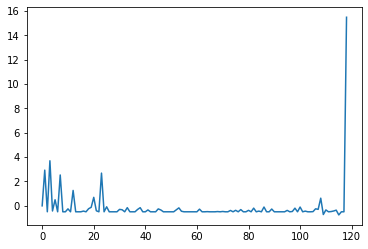

In [904]:
HQT.Q_table

{0: {((0, 0), (0.0, 0.0), 4): {4: 0.0}},
 1: {((0, 0), (0, 0), 0): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (0, 1), 0): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (1, 0), 0): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (1, 1), 0): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (0, 0), 1): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (0, 1), 1): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (1, 0), 1): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (1, 1), 1): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (0, 0), 2): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (0, 1), 2): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (1, 0), 2): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (1, 1), 2): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (0, 0), 3): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (0, 1), 3): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (1, 0), 3): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (1, 1), 3): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
  ((0, 0), (0, 0), 4): {0: 0, 1: 0, 2: 0, 3: 0, 4: -16.033053320428053},
  (

In [903]:
pd.pivot_table(df3,index='episode',columns='i',values='TotalNumberOFSteps').mean(axis=1).rolling(10).mean()

episode
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
995     66.266667
996    108.600000
997    106.333333
998    102.733333
999    122.833333
Length: 1000, dtype: float64

In [314]:
pd.pivot_table(df3,index='episode',columns='i',values='TotalNumberOFSteps').mean(axis=1)

episode
0      178.85
1      131.70
2       85.45
3      101.05
4       25.30
        ...  
495     15.35
496     18.85
497     14.90
498     16.95
499     18.00
Length: 500, dtype: float64

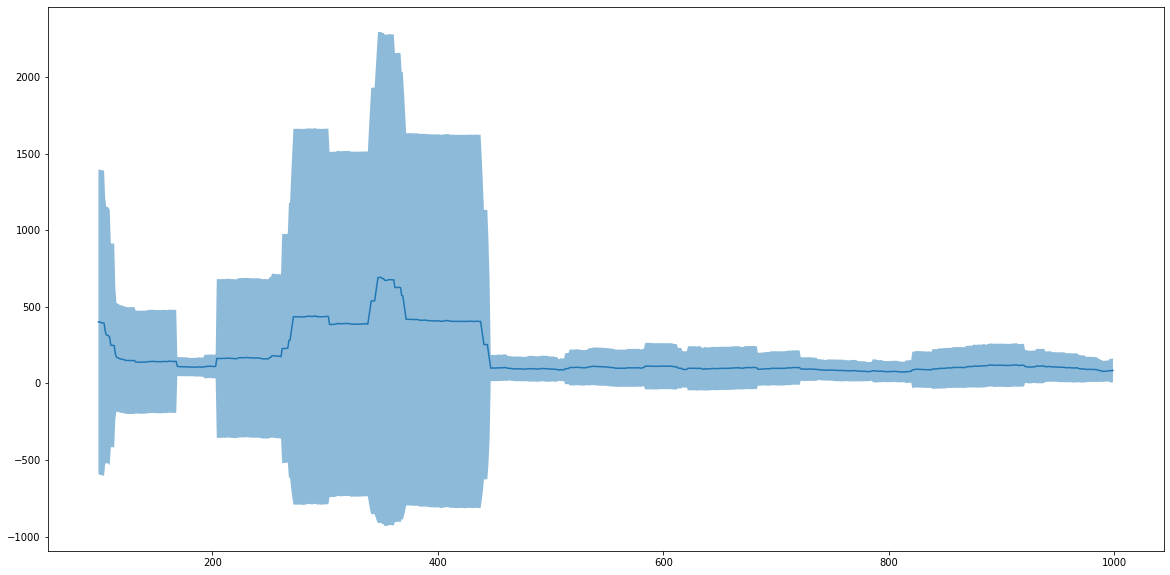

In [548]:
# df2=pd.DataFrame(results).T
mean=pd.pivot_table(df2,index='episode',columns='i',values='Reward').mean(axis=1).rolling(50).mean()
standard_deviation=pd.pivot_table(df2,index='episode',columns='i',values='Reward').mean(axis=1).rolling(50).std()
plt.figure(figsize=(20,10))
plt.plot(mean)
plt.fill_between(mean.index, mean - standard_deviation, mean + standard_deviation,alpha=0.5)


# .plot(figsize=(20,10))

NameError: name 'df2' is not defined

In [1039]:
env.goal_state

[0, 0]

In [ ]:
pd.pivot_table(df2,index='episode',columns='i',values='Reward').mean(axis=1).rolling(50).std().plot(figsize=(20,10))

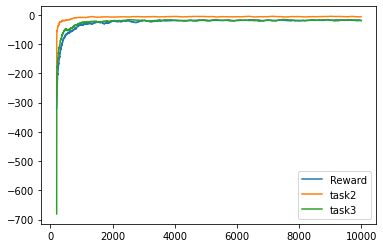

In [1295]:
import matplotlib.pyplot as plt
df.Reward.rolling(200).mean().plot()
df1.Reward.rolling(200).mean().plot(label='task2')
df2.Reward.rolling(200).mean().plot(label='task3')

plt.legend()

In [1057]:
env.current_level

3

In [1025]:
tuple(env.manager_list[env.current_level-1])

(0.0, 0.0)

<AxesSubplot:>

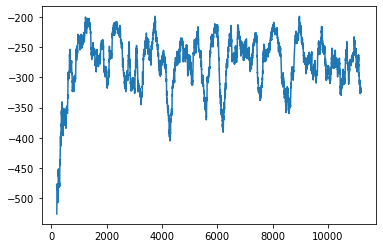

In [936]:
aaa=df.TotalNumberOFSteps.divide(df.Fastest)

In [1333]:
HQT.Q_table

{0: {(0, 0): {0: -17.280892197199954,
   1: -17.271561823811545,
   2: -17.28159414678322,
   3: -17.270567520241663,
   4: -17.27729377255779}},
 1: {(0, 0): {0: -19.772645283710116,
   1: -19.772726969003315,
   2: -19.772972409865286,
   3: -19.771993652044998,
   4: -19.77370902879129},
  (0, 1): {0: -19.742270225605374,
   1: -19.742752007445752,
   2: -19.744239471239855,
   3: -19.74306241059361,
   4: -19.742408535194716},
  (1, 0): {0: -19.77524007118979,
   1: -19.774976497165046,
   2: -19.775112468218108,
   3: -19.77425449724473,
   4: -19.774584992496713},
  (1, 1): {0: -19.759612289045865,
   1: -19.760286183662835,
   2: -19.76146701332347,
   3: -19.75937673631614,
   4: -19.76054401881633}},
 2: {(0, 0): {0: -16.825513271061723,
   1: -16.828933047503284,
   2: -16.824995020899745,
   3: -16.831823678098132,
   4: -16.835341875225758},
  (0, 1): {0: -16.94263932552593,
   1: -16.968089645702573,
   2: -16.94834345926595,
   3: -16.96868554555603,
   4: -16.95693013993

<AxesSubplot:>

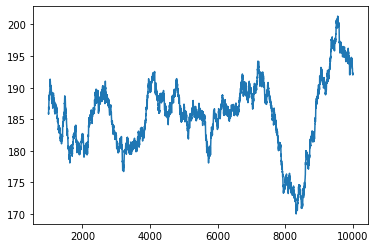

In [940]:
df.TotalNumberOFSteps.rolling(1000).mean().plot()

In [894]:
tuple(env.starting_state)tuple(env.goal_state)

TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

In [914]:
import pprint as pprint

In [876]:
import pandas as pd

In [1314]:
pprint.pprint(HQT.Q_table)

{0: {(0, 0): {0: -19.999999955722735,
              1: -19.999999955857376,
              2: -19.99999995581861,
              3: -19.999999955681208,
              4: -19.99999995575168}},
 1: {(0, 0): {0: -1.9499999999999984,
              1: -0.9999999999999996,
              2: -0.9999999999999996,
              3: -1.9499999999999984,
              4: -1.9499999999999984},
     (0, 1): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
     (1, 0): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
     (1, 1): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}},
 2: {(0, 0): {0: -19.93296053681583,
              1: -19.932167712494163,
              2: -19.932664621712984,
              3: -19.93322654646499,
              4: -19.934497041362633},
     (0, 1): {0: -19.931006341844665,
              1: -19.929906464721256,
              2: -19.93054007946301,
              3: -19.931887097572222,
              4: -19.93100866310291},
     (0, 2): {0: -19.923211597558204,
              1: -19.915458074456993,
              2: -19.92275192

               1: -14.561799387734323,
               2: -14.560405144404891,
               3: -13.430599778325695,
               4: -14.569923789682544},
     (7, 15): {0: -14.681974079916227,
               1: -14.65391952184549,
               2: -14.66818632692749,
               3: -14.475350435337791,
               4: -14.658013141898712},
     (8, 0): {0: -13.018366910115287,
              1: -12.964512637623608,
              2: -10.18839022452248,
              3: -12.986537790865706,
              4: -12.998654162773384},
     (8, 1): {0: -11.885703880295141,
              1: -11.85552296653428,
              2: -7.578847532012535,
              3: -11.747246398153958,
              4: -11.70897462014223},
     (8, 2): {0: -11.641052874964714,
              1: -11.758440874681177,
              2: -4.282022386763932,
              3: -11.648184479281177,
              4: -11.777394257483081},
     (8, 3): {0: -9.83963267831493,
              1: -11.19341155836785,
        

In [878]:
pd.DataFrame.from_dict(HQT.Q_table).T


0  \
                                                   0   
0  {0: -0.6106388567189921, 1: -1.151874715244644...   
1  {0: -19.80984804046727, 1: -19.814612406840734...   
2  {0: -1.5930123246715122, 1: -2.096458028622493...   
3  {0: -0.42551569883722357, 1: -0.57867212267119...   

                                                      \
                                                   1   
0                                                NaN   
1  {0: -19.811174786866946, 1: -19.81576686173626...   
2  {0: -2.855289562156394, 1: -3.3570962506271167...   
3  {0: -0.4813474019479611, 1: -0.661640595955972...   

                                                   1  \
                                                   0   
0                                                NaN   
1  {0: -11.955371733112731, 1: -12.17580018787411...   
2  {0: -9.424050798246903, 1: -9.703683795141231,...   
3  {0: -0.1868421087172562, 1: -8.538827362344211...   

                                                      \
                                                   1   
0                                                NaN   
1  {0: -11.837691079255785, 1: -12.07177959144310...   
2  {0: -13.865303700707111, 1: -14.01736717826284...   
3  {0: -0.47732476135365587, 1: -8.30589255980965...   

                                                   0  \
                                                   2   
0                                                NaN   
1                                                NaN   
2  {0: -2.5699100133707775, 1: -3.144586009892755...   
3  {0: -0.6287339154576329, 1: -0.820953982156218...   

                                                      \
                                                   3   
0                                                NaN   
1                                                NaN   
2  {0: -1.2018383390617566, 1: -1.773832464515226...   
3  {0: -0.34704129725238875, 1: -0.81213472069015...   

                                                   1  \
                                                   2   
0                                                NaN   
1                                                NaN   
2  {0: -13.819255857157216, 1: -13.97183548994339...   
3  {0: -0.34019635288000366, 1: -9.16867827170803...   

                                                      \
                                                   3   
0                                                NaN   
1                                                NaN   
2  {0: -9.355167150233548, 1: -9.674754468267592,...   
3  {0: -0.5908389886084551, 1: -9.249910858640662...   

                                                   2  \
                                                   0   
0                                                NaN   
1                                                NaN   
2  {0: -19.188251011247456, 1: -19.21254151261569...   
3  {0: -11.255923564696337, 1: -3.822361737556142...   

                                                      ...  \
                                                   1  ...   
0                                                NaN  ...   
1                                                NaN  ...   
2  {0: -19.925289684133812, 1: -19.92758920333181...  ...   
3  {0: -11.379816526953048, 1: -4.095427212206903...  ...   

                                                   6  \
                                                   6   
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  {0: -28.24389567999682, 1: -19.7370202724043, ...   

                                                      \
                                                   7   
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  {0: -28.470469258843828, 1: -19

In [875]:
HQT.Q_table

{0: {(0, 0): {0: -0.6106388567189921,
   1: -1.151874715244644,
   2: -1.1805167170261268,
   3: -1.1330797419430196,
   4: -1.1707369951515303}},
 1: {(0, 0): {0: -19.80984804046727,
   1: -19.814612406840734,
   2: -19.814459448883156,
   3: -19.814872850987307,
   4: -19.815258020775584},
  (0, 1): {0: -19.811174786866946,
   1: -19.815766861736265,
   2: -19.815874981302926,
   3: -19.815943284978488,
   4: -19.816225716580114},
  (1, 0): {0: -11.955371733112731,
   1: -12.175800187874117,
   2: -12.163454632800065,
   3: -12.204519568769618,
   4: -12.195620303567662},
  (1, 1): {0: -11.837691079255785,
   1: -12.071779591443107,
   2: -12.068342740663272,
   3: -12.077510646152271,
   4: -12.078462115766131}},
 2: {(0, 0): {0: -1.5930123246715122,
   1: -2.096458028622493,
   2: -2.091512512261336,
   3: -2.0444083254196452,
   4: -2.1159030862153716},
  (0, 1): {0: -2.855289562156394,
   1: -3.3570962506271167,
   2: -3.3889724164949855,
   3: -3.3896319024686514,
   4: -3.37721

In [874]:
pprint(HQT.Q_table)


TypeError: 'module' object is not callable

In [839]:
env.goal_state

[6, 5]

In [840]:
env.current_state

[6, 5]

In [829]:
HQT.Q_table[current_level][tuple(current_state)][action]

0

In [815]:
max(HQT.Q_table[current_level][current_state].values())

0

In [800]:
current_state=[tuple(env.manager_list[env.current_level]) if env.current_level+1<env.layers else tuple(env.current_state)]


In [802]:
current_state[0]

(0.0, 0.0)

In [779]:
HQT.Q_table[env.current_level][tuple(env.manager_list[env.current_level])]

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0}

In [747]:
env.current_state

(6, 5)

In [864]:
HQT.Q_table

{0: {(0, 0): {0: 0, 1: 0, 2: 0, 3: -0.01, 4: 0}},
 1: {(0, 0): {0: -0.18627401939884114,
   1: -0.27391519057633706,
   2: -0.30714097145974845,
   3: -0.3343913166733167,
   4: -0.2782227462735092},
  (0, 1): {0: -0.21884884087268547,
   1: -0.4949278418508594,
   2: -0.4750694328979369,
   3: -0.43693196700336157,
   4: -0.41082579020515414},
  (1, 0): {0: -0.029985002499999996,
   1: -0.10595960502937014,
   2: -0.0595475811634125,
   3: -0.0395939425,
   4: -0.0592674635452},
  (1, 1): {0: -0.029985002499999996,
   1: -0.09653446364010092,
   2: -0.059176206924250005,
   3: -0.09681366187614843,
   4: -0.049666306425249995}},
 2: {(0, 0): {0: 0, 1: -0.01, 2: 0, 3: -0.01, 4: 0},
  (0, 1): {0: 0, 1: -0.01, 2: -0.0199, 3: -0.0199, 4: -0.01},
  (0, 2): {0: -0.01, 1: -0.01, 2: -0.0199, 3: -0.029701, 4: -0.01},
  (0, 3): {0: 0, 1: -0.01, 2: -0.029701, 3: 0, 4: 0},
  (1, 0): {0: -0.0498551674225125,
   1: -0.09719751571309589,
   2: -0.07837875190283228,
   3: -0.05982844565932725,
   4: 

In [756]:
HQT.Q_table[env.current_level][tuple(env.starting_managers[0])]

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0}

In [692]:

    
    
    
#     for na in range(env.number_actions):
#         env.Q_table[i][na]={'Qvalues':env.Maze[i][1]}

In [1101]:
action_values=HQT.Q_table[env.current_level][tuple(env.current_state)].values()

AttributeError: 'HierarchicalMaze' object has no attribute 'current_level'

In [1111]:
np.argmax(HQT.Q_table[current_level][(0,0)].values())

0

In [1120]:
v=[0,0,0,0,0]

In [1155]:
random.choice(np.where(v==np.amax([0,0,0,0,0]))[0])


3

In [ ]:
np.argwhere(listy == np.amax(listy))

In [1001]:
env.goal_locations

[[0.0, 0.0], [1.0, 1.0], [3.0, 3.0]]

In [645]:
def __init__(self, numberActions, numberLayers=3):
        self.number_actions = numberActions
        self.number_layers = numberLayers
        self.levels = {0: FeudalLevel(actions=[numberActions])}
        if(numberLayers > 1):
            for i in range(1, numberLayers-1):
                self.levels[i] = FeudalLevel(
                    actions=list(range(numberActions+1)))
            self.levels[numberLayers -
                        1] = FeudalLevel(actions=list(range(numberActions)))


[(1, array([[0.]])),
 (2, array([[0., 0.],
         [0., 0.]])),
 (3,
  array([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]])),
 (4,
  array([[0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.]]))]

In [647]:
n_steps = 20
for step in range(n_steps):
  print("Step {}".format(step + 1))
  action=random.choice(list(range(5)))
  obs, reward, done, info = env.step(action)
  print('obs=', obs, 'reward=', reward, 'done=', done)
  print('Action:',action,'Level:',env.current_level)
  print(info)
#   env.render()
  if done:
    print("Goal reached!", "reward=", reward)
    break

Step 1
CurrentManager: [0.0, 1.0]
Goals: [[0.0, 0.0], [0.0, 1.0], [2.0, 2.0]]
Action 1 GoalsChanged: [[0.0, 0.0], [1.0, 1.0], [2.0, 2.0]]
obs= [3, 7] reward= -1 done= False
Action: 1 Level: 2
{'SubGoals': [[0.0, 0.0], [1.0, 1.0], [2.0, 2.0]], 'CurrentLevel': 2, 'ManagerList': [[0.0, 0.0], [0.0, 1.0], [1.0, 3.0]]}
Step 2
obs= [3, 7] reward= -1 done= False
Action: 4 Level: 3
{'SubGoals': [[0.0, 0.0], [1.0, 1.0], [2.0, 2.0]], 'CurrentLevel': 3, 'ManagerList': [[0.0, 0.0], [0.0, 1.0], [1.0, 3.0]]}
Step 3
Base Level
0 x down, 1 x up,2 y up,3 y down
obs= [3, 7] reward= -1 done= False
Action: 2 Level: 3
{'SubGoals': [[0.0, 0.0], [1.0, 1.0], [2.0, 2.0]], 'CurrentLevel': 3, 'ManagerList': [[0.0, 0.0], [0.0, 1.0], [1.0, 3.0]]}
Step 4
Base Level
0 x down, 1 x up,2 y up,3 y down
obs= [3, 6] reward= -1 done= False
Action: 3 Level: 3
{'SubGoals': [[0.0, 0.0], [1.0, 1.0], [2.0, 2.0]], 'CurrentLevel': 3, 'ManagerList': [[0.0, 0.0], [0.0, 1.0], [1.0, 3.0]]}
Step 5
Base Level
0 x down, 1 x up,2 y up,3 y

In [581]:
def q(s,discount_factor,V,env):
    q_values=np.zeros(4)
#     Q value for state s action a is the current q value plus 
#     the future discounted rewards for next states weighed by the 
#     transition probability"""
    for a in range(env.nA):
        for transition,ns,reward,term in env.P[s][a]:
            q_values[a]=q_values[a]+transition*(reward+discount_factor*V[ns])
        

[7, 1]

In [522]:
a=HierarchicalMaze()
print(a.starting_state)
print(a.starting_level)

[2, 6]
0


In [523]:
a.goal_locations

[[0.0, 0.0], [1.0, 1.0], [2.0, 3.0]]

In [526]:
for x in range(3,0,-1):
    print(x)

3
2
1


In [502]:
a.step(3)


(-1, [5, 6], False, {0: [0, 0], 1: [1.0, 0], 2: [2.0, 0], 3: [0, 0]}, 3)

In [519]:
[a
 
 for zip((a.get_super_manager(a.current_state),list(a.goals.values())[:-1]))]

SyntaxError: invalid syntax (<ipython-input-519-599e716c1845>, line 3)

[[0, 0], [1.0, 0], [2.0, 0]]

In [430]:
get_super_manager(a.starting_state)

[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]

In [433]:
a.step(1)

NameError: name 'self_layers' is not defined

In [431]:
current_state=[6,5]
aa=get_super_manager(current_state)

In [432]:
current_state

[6, 5]

In [174]:
Maze[-1][1][current_state[0]][current_state[1]]=1

In [407]:
a.Maze

[(1, array([[0.]])),
 (2, array([[0., 0.],
         [0., 0.]])),
 (3,
  array([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]])),
 (4,
  array([[0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.]]))]

In [344]:
aa

[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]

In [319]:
[round(x/(2**number_of_levels/2)*(number_of_levels)) for x in current_state]

[2, 2]

In [297]:
[( f)

[0.75, 2.0]

In [247]:
number_of_levels=max([x[0] for x in Maze])

In [248]:
number_of_levels

4

In [175]:
Maze

[(1, array([[0.]])),
 (2, array([[0., 0.],
         [0., 0.]])),
 (3,
  array([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 1., 0., 0.]]))]

In [162]:
[y/4 for y in range(64)]

[0.0,
 0.25,
 0.5,
 0.75,
 1.0,
 1.25,
 1.5,
 1.75,
 2.0,
 2.25,
 2.5,
 2.75,
 3.0,
 3.25,
 3.5,
 3.75,
 4.0,
 4.25,
 4.5,
 4.75,
 5.0,
 5.25,
 5.5,
 5.75,
 6.0,
 6.25,
 6.5,
 6.75,
 7.0,
 7.25,
 7.5,
 7.75,
 8.0,
 8.25,
 8.5,
 8.75,
 9.0,
 9.25,
 9.5,
 9.75,
 10.0,
 10.25,
 10.5,
 10.75,
 11.0,
 11.25,
 11.5,
 11.75,
 12.0,
 12.25,
 12.5,
 12.75,
 13.0,
 13.25,
 13.5,
 13.75,
 14.0,
 14.25,
 14.5,
 14.75,
 15.0,
 15.25,
 15.5,
 15.75]

In [151]:
Maze

[array([[0.]]),
 array([[0., 0.],
        [0., 0.]]),
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [1., 0., 0., 0.]])]

In [110]:
tart_state_index = np.ravel_multi_index((3, 0), shape)

In [111]:
tart_state_index

36

In [112]:
np.zeros(shape, dtype=np.bool)

array([[False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False]])

In [90]:
possible_start_states

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15])

In [93]:
np.random.shuffle(possible_start_states

4

In [94]:
import numpy as np
import random as random

In [4]:
number_of_tiles=16
nS=number_of_tiles
grid = np.arange(nS).reshape([4,4])

In [28]:
it = np.nditer(grid, flags=['multi_index'])

In [8]:
it

In [29]:
while not it.finished:
    s = it.iterindex
    y, x = it.multi_index
    P[s] = {a : [] for a in range(nA)}    
    it.iternext()

In [22]:
nA=4

In [20]:
P={}

In [31]:
is_done = lambda s: s == 0 or s == (nS - 1)

<function __main__.<lambda>(s)>

In [1]:
import numpy as np
import time
import sys
if sys.version_info.major == 2:
    import Tkinter as tk
else:
    import tkinter as tk


UNIT = 40   # pixels
MAZE_H = 4  # grid height
MAZE_W = 4  # grid width


class Maze(tk.Tk, object):
    def __init__(self):
        super(Maze, self).__init__()
        self.action_space = ['u', 'd', 'l', 'r']
        self.n_actions = len(self.action_space)
        self.title('maze')
        self.geometry('{0}x{1}'.format(MAZE_H * UNIT, MAZE_H * UNIT))
        self._build_maze()

    def _build_maze(self):
        self.canvas = tk.Canvas(self, bg='white',
                                height=MAZE_H * UNIT,
                                width=MAZE_W * UNIT)

        # create grids
        for c in range(0, MAZE_W * UNIT, UNIT):
            x0, y0, x1, y1 = c, 0, c, MAZE_H * UNIT
            self.canvas.create_line(x0, y0, x1, y1)
        for r in range(0, MAZE_H * UNIT, UNIT):
            x0, y0, x1, y1 = 0, r, MAZE_H * UNIT, r
            self.canvas.create_line(x0, y0, x1, y1)

        # create origin
        origin = np.array([20, 20])

        # create oval
        oval_center = origin + UNIT * 3
        self.oval = self.canvas.create_oval(
            oval_center[0] - 15, oval_center[1] - 15,
            oval_center[0] + 15, oval_center[1] + 15,
            fill='yellow')

        # create red square
        #red_center_x = origin + (UNIT * np.random.randint(0, 4))
        #red_center_y = origin + (UNIT * np.random.randint(0, 4))
        self.rect = self.canvas.create_rectangle(
            origin[0] - 15, origin[1] - 15,
            origin[0] + 15, origin[1] + 15,
            fill='red')

        # pack all
        self.canvas.pack()

    def reset(self):
        self.update()
        # time.sleep(0.5)
        self.canvas.delete(self.rect)
        origin = np.array([20, 20])
        self.rect = self.canvas.create_rectangle(
            origin[0] - 15, origin[1] - 15,
            origin[0] + 15, origin[1] + 15,
            fill='red')
        # return observation
        s_ = self.canvas.coords(self.rect)
        x = (s_[0] - 5) / 40
        y = (s_[1] - 5) / 40
        s_ = (int(x), int(y))
        return s_

    def step(self, action):
        s = self.canvas.coords(self.rect)
        base_action = np.array([0, 0])
        if action == 0:   # up
            if s[1] > UNIT:
                base_action[1] -= UNIT
        elif action == 1:   # down
            if s[1] < (MAZE_H - 1) * UNIT:
                base_action[1] += UNIT
        elif action == 2:   # right
            if s[0] < (MAZE_W - 1) * UNIT:
                base_action[0] += UNIT
        elif action == 3:   # left
            if s[0] > UNIT:
                base_action[0] -= UNIT

        self.canvas.move(
            self.rect, base_action[0], base_action[1])  # move agent

        s_ = self.canvas.coords(self.rect)  # next state

        # reward function
        if s_ == self.canvas.coords(self.oval):
            reward = 1
            done = True
        else:
            reward = -1
            done = False

        x = (s_[0] - 5) / 40
        y = (s_[1] - 5) / 40
        return (int(x), int(y)), reward, done

    def render(self):
        # time.sleep(0.1)
        self.update()


    def update():
        for t in range(10):
            s = env.reset()
            while True:
                env.render()
                a = 1
                s, r, done = env.step(a)
                if done:
                    break


# if __name__ == '__main__':
#     env = Maze()
#     env.after(100, update)
#     env.mainloop()


In [13]:
import numpy as np
import pandas as pd


class FeudalQLearningTable:
    def __init__(self, numberActions, numberLayers=3):
        self.number_actions = numberActions
        self.number_layers = numberLayers
        self.levels = {0: FeudalLevel(actions=[numberActions])}
        if(numberLayers > 1):
            for i in range(1, numberLayers-1):
                self.levels[i] = FeudalLevel(
                    actions=list(range(numberActions+1)))
            self.levels[numberLayers -
                        1] = FeudalLevel(actions=list(range(numberActions)))

    def choose_action(self, state):
        level_states = self.get_level_states(state)
        actions = []
        print('...')
        print(level_states)
        for a in range(self.number_layers):
            actions.append(self.levels[a].choose_action(level_states[a]))
        print(actions)
        print('....')
        return actions

    def learn(self, s, actions, r, s_, done):
        level_states = self.get_level_states(s)
        level_states_prime = self.get_level_states(s_)

        obey_reward = 0
        not_obey_reward = -1

        for i in range(self.number_layers):
            if i == 0:
                reward = r
            else:
                if actions[i-1] == 4:
#                     also not correct...this means search for goal
                    reward = r
                else:
                    if actions[i-1] == actions[i]:
#                         i.e. the goal is to move in the same direction?????
                        reward = obey_reward
                    else:
#             penalty should be for changing to wrong state
                        reward = not_obey_reward

            self.levels[i].learn(level_states[i], actions[i],
                                 reward, level_states_prime[i], done)

    def get_level_states(self, state):
        states = []
        states.append(state)
        for i in range(self.number_layers-2, -1, -1):
            states.append((int(states[-1][0]/2), int(states[-1][1]/2)))
        states.reverse()
        return states


class FeudalLevel:

    def __init__(self, actions, learning_rate=0.01, reward_decay=0.9, e_greedy=0.9):
        self.actions = actions  # a list
        self.lr = learning_rate
        self.gamma = reward_decay
        self.epsilon = e_greedy
        self.q_table = pd.DataFrame(columns=self.actions, dtype=np.float_)

    def choose_action(self, observation):
        observation = str(observation)
        self.check_state_exist(observation)
        # action selection
        if np.random.uniform() < self.epsilon:
            # choose best action
            state_action = self.q_table.loc[observation, :]
            state_action = state_action.reindex(
                np.random.permutation(state_action.index))  # some actions have same value
            action = state_action.idxmax()
        else:
            # choose random action
            action = np.random.choice(self.actions)
#         print(action)
        return action

    def learn(self, s, a, r, s_, done):
        s = str(s)
        s_ = str(s_)
        self.check_state_exist(s_)
        q_predict = self.q_table.loc[s, a]
        if not done:
            # next state is not terminal
            q_target = r + self.gamma * self.q_table.loc[s_, :].max()
        else:
            q_target = r  # next state is terminal
        self.q_table.loc[s, a] += self.lr * (q_target - q_predict)  # update

    def check_state_exist(self, state):
        if state not in self.q_table.index:
            # append new state to q table
            self.q_table = self.q_table.append(
                pd.Series(
                    [0] * len(self.actions),
                    index=self.q_table.columns,
                    name=state,
                )
            )


In [14]:
log = pd.DataFrame(columns=['Episode', 'Length', 'Reward','IMG','LOG'])
env = Maze()
rl = FeudalQLearningTable(numberActions=env.n_actions)

In [15]:
#  ['u', 'd', 'l', 'r'] [0,1,2,3]

TypeError: get_level_states() missing 1 required positional argument: 'state'

In [17]:
for episode in range(1):
        episode_log = pd.DataFrame(columns=['ACTION', 'REWARD', 'A0','A1','A2','A3','V'])
        step_counter = 1
        episode_reward = 0
#         reset environment
        observation = env.reset()
        while True:
    #             env.render()

            actions = rl.choose_action(observation)
            observation_, reward, done = env.step(actions[2])
            
            episode_reward += reward

            rl.learn(observation, actions, reward, observation_, done)
            print(str(episode+1)+"-"+str(step_counter),str(observation), actions, str(observation_))
            
            action_values = rl.levels[2].q_table.loc[str(observation), :]
            episode_log.loc[len(episode_log)] = [actions[2], reward, action_values[0], action_values[1], action_values[2], action_values[3], episode_reward]
            
            observation = observation_
            if done:
                break
            step_counter = step_counter + 1

...
[(0, 0), (0, 0), (0, 0)]
[4, 1, 2]
....
1-1 (0, 0) [4, 1, 2] (1, 0)
...
[(0, 0), (0, 0), (1, 0)]
[4, 4, 1]
....
1-2 (1, 0) [4, 4, 1] (1, 1)
...
[(0, 0), (0, 0), (1, 1)]
[4, 0, 1]
....
1-3 (1, 1) [4, 0, 1] (1, 2)
...
[(0, 0), (0, 1), (1, 2)]
[4, 0, 2]
....
1-4 (1, 2) [4, 0, 2] (2, 2)
...
[(0, 0), (1, 1), (2, 2)]
[4, 0, 1]
....
1-5 (2, 2) [4, 0, 1] (2, 3)
...
[(0, 0), (1, 1), (2, 3)]
[4, 2, 2]
....
1-6 (2, 3) [4, 2, 2] (3, 3)


In [6]:
actions

[4, 2, 2]

AttributeError: 'FeudalQLearningTable' object has no attribute 'actions'